# **Project Name**    - Mobile Price Range Prediction





##### **Project Type**    - Classification
##### **Contribution**    - Team
##### **Team Member 1 -** Shreyash Sarode
##### **Team Member 2 -** Tushar Khirnar
##### **Team Member 3 -** Pradnya Pagar
##### **Team Member 4 -** Taha Nakedar

# **Project Summary -**

Now a days Mobile is one of the most selling and purchasing device. Every day new mobiles with new version and more features are launched. Thousands of mobiles are sold and purchased on daily basis.

Therefore, Price estimation and prediction is an important part of consumer strategy as a new product that has to be launched, must have the correct price so that the consumers find it appropriate to buy the product. During the purchase of mobile phones, people fail to make correct decisions due to the non-availability of necessary resources to cross validate the price. To address this issue, we developed different classification models using the data related to different features of a mobile phone. The developed model is then used to predict the price range of the new mobile phones.

The main objective of this work is to find out the relationship between features of a mobile phone and its price range which indicates whether the mobile would be cheap(0), mid-range(1), expensive(2) or very expensive(3). We will be using different classification models to accurately classify the data in correct price ranges.

Based on our dataset, Data prepressing was the first step followed. After that i am going to do Exploratory Data Analysis and Data Visualization in which we are finding some insights from the data and relations between the features.

Then we will select the important features for classification model and try the various classification models. After checking the accuracy and confusion matrix we will select the best model for this dataset.

In this project we are going to use Decision tree classifier, Random forest classifier, Gradient boosting classifier, K- nearest neighbour classifier, XGboost classifier and Support vector machine classifier with Hyperparameter tuning and cross validation techniques to obtain best result




# **GitHub Link -**

https://github.com/sarodeshreyash/Mobile-Price-Range-Prediction

# **Problem Statement**


**In the competitive mobile phone market companies want
to understand sales data of mobile phones and factors which drive the prices.
The objective is to find out some relation between features of a mobile phone(eg:- RAM,
Internal Memory, etc) and its selling price. In this problem, we do not have to predict the
actual price but a price range indicating how high the price is.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix,confusion_matrix,roc_curve,roc_auc_score,auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import missingno as msno
from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", 30)


### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
data = pd.read_csv('/content/drive/MyDrive/Almabetter/Capstone 3 ML Classification/data_mobile_price_range.csv')

### Dataset First View

In [4]:
# Dataset First Look
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count

print(f'Number of Rows= {data.shape[0]} \nNumber of Columns= {data.shape[1]}')

Number of Rows= 2000 
Number of Columns= 21


### Dataset Information

In [6]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
print(f'duplicted values in the data: {data.duplicated().sum()}')

duplicted values in the data: 0


#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
missing_values = data.isna().sum()
print(missing_values)

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


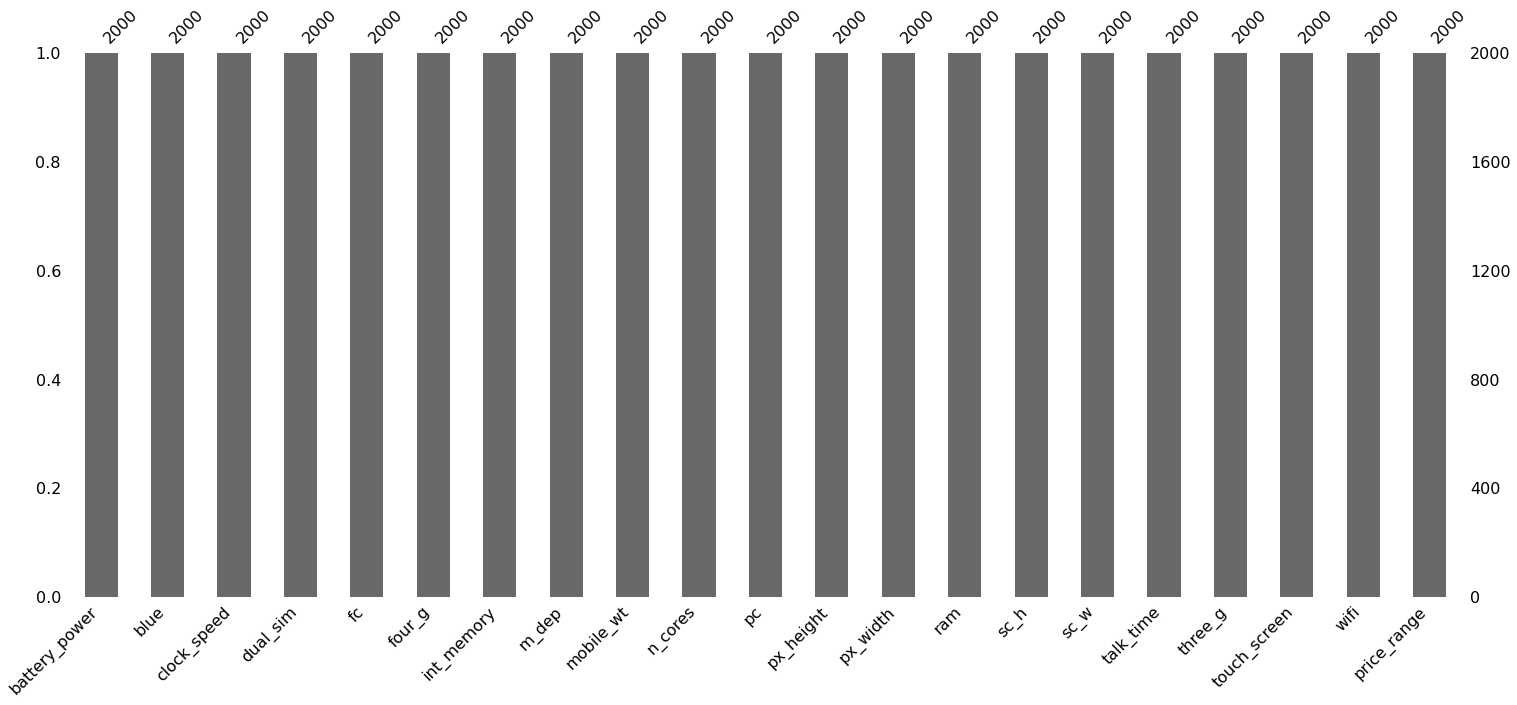

In [9]:
# Visualizing the missing values
msno.bar(data)

### What did you know about your dataset?

We have a data containing 2000 rows and 21 columns with zero missing values

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [11]:
# Dataset Describe
data.describe(include='all')

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


### Variables Description 

* **Battery_power** - Total energy a battery can store in one time measured in mAh
* **Blue** - Has bluetooth or not
* ***Clock_speed*** - speed at which microprocessor executes instructions
* ***Dual_sim*** - Has dual sim support or not
* ***Fc*** - Front Camera mega pixels
* ***Four_g*** - Has 4G or not
* ***Int_memory*** - Internal Memory in Gigabytes
* ***M_dep*** - Mobile Depth in cm
* ***Mobile_wt*** - Weight of mobile phone
* ***N_cores*** - Number of cores of processor
* ***Pc*** - Primary Camera mega pixels
* ***Px_height*** - Pixel Resolution Height
* ***Px_width*** - Pixel Resolution Width
* ***Ram*** - Random Access Memory in Mega Bytes
* ***Sc_h*** - Screen Height of mobile in cm
* ***Sc_w*** - Screen Width of mobile in cm
* ***Talk_time*** - longest time that a single battery charge will last when you are
* ***Three_g*** - Has 3G or not
* ***Touch_screen*** - Has touch screen or not
* ***Wifi*** - Has wifi or not
* ***Price_range*** - This is the target variable with value of 
* 0(low cost), 
* 1(medium cost),
* 2(high cost) and
* 3(very high cost).
* Thus our target variable has 4 categories so basically it is a Multiclass classification problem.

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
data.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [13]:
# Write your code to make your dataset analysis ready.
# we are replacing the columns names with understandable names

data=data.rename(index=str, columns={"battery_power": "Battery Power", "blue": "Bluetooth","clock_speed":"Clock Speed","dual_sim":"Dual Sim","fc":"Front Camera MP",
                                   "four_g":"4G","int_memory":"Internal Memory(GB)","m_dep":"Mobile Depth(CM)","mobile_wt":"Weight","n_cores":"Number of cores","pc":"Primary Camera MP"
                                   ,"px_height":"Pixel R. Height","px_width":"Pixel R. Width","ram":"RAM(MB)","sc_h":"Screen Height(cm)","sc_w":"Screen Width",
                                   "talk_time":"Longest Battery Charge","three_g":"3G","touch_screen":"Touch Screen","wifi":"WIFI","price_range":"Price Range"})
data

,Battery Power,Bluetooth,Clock Speed,Dual Sim,Front Camera MP,4G,Internal Memory(GB),Mobile Depth(CM),Weight,Number of cores,Primary Camera MP,Pixel R. Height,Pixel R. Width,RAM(MB),Screen Height(cm),Screen Width,Longest Battery Charge,3G,Touch Screen,WIFI,Price Range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


In [14]:
# Lets check unique values in the data

for col in data:
    print(f"{col}: {data[col].unique()}\n")

Battery Power: [ 842 1021  563 ... 1139 1467  858]

Bluetooth: [0 1]

Clock Speed: [2.2 0.5 2.5 1.2 1.7 0.6 2.9 2.8 2.1 1.  0.9 1.1 2.6 1.4 1.6 2.7 1.3 2.3
 2.  1.8 3.  1.5 1.9 2.4 0.8 0.7]

Dual Sim: [0 1]

Front Camera MP: [ 1  0  2 13  3  4  5  7 11 12 16  6 15  8  9 10 18 17 14 19]

4G: [0 1]

Internal Memory(GB): [ 7 53 41 10 44 22 24  9 33 17 52 46 13 23 49 19 39 47 38  8 57 51 21  5
 60 61  6 11 50 34 20 27 42 40 64 14 63 43 16 48 12 55 36 30 45 29 58 25
  3 54 15 37 31 32  4 18  2 56 26 35 59 28 62]

Mobile Depth(CM): [0.6 0.7 0.9 0.8 0.1 0.5 1.  0.3 0.4 0.2]

Weight: [188 136 145 131 141 164 139 187 174  93 182 177 159 198 185 196 121 101
  81 156 199 114 111 132 143  96 200  88 150 107 100 157 160 119  87 152
 166 110 118 162 127 109 102 104 148 180 128 134 144 168 155 165  80 138
 142  90 197 172 116  85 163 178 171 103  83 140 194 146 192 106 135 153
  89  82 130 189 181  99 184 195 108 133 179 147 137 190 176  84  97 124
 183 113  92  95 151 117  94 173 105 115  91 112 123

In [15]:

# we can see some zero values in some columns lets find out how many are they.

# in column 'Pixel R. Height'
print(data[data['Pixel R. Height']==0].shape[0])

# in column 'Screen Width'
print(data[data['Screen Width']==0].shape[0])


2
180


In [16]:
# in column 'Pixel R. Height' and 'Screen Width' have 0 values so we can drop them

data = data[data['Pixel R. Height']!=0]

data = data [data['Screen Width']!=0]

In [17]:
# lets see is the null values are drop or not

print(data[data['Pixel R. Height']==0].shape[0])

print(data[data['Screen Width']==0].shape[0])

0
0


In [18]:
# import KNN imputer from sklearn
from sklearn.impute import KNNImputer

impute_knn = KNNImputer(n_neighbors=1)
data=pd.DataFrame(impute_knn.fit_transform(data),columns=data.columns)

In [19]:
# Lets check 

data.isna().sum()

Battery Power             0
Bluetooth                 0
Clock Speed               0
Dual Sim                  0
Front Camera MP           0
4G                        0
Internal Memory(GB)       0
Mobile Depth(CM)          0
Weight                    0
Number of cores           0
Primary Camera MP         0
Pixel R. Height           0
Pixel R. Width            0
RAM(MB)                   0
Screen Height(cm)         0
Screen Width              0
Longest Battery Charge    0
3G                        0
Touch Screen              0
WIFI                      0
Price Range               0
dtype: int64

### What all manipulations have you done and insights you found?

**1. Feature names are not understandable so I rename them and make them easily understandable.**

**2. Data have zero values in some features so we drop them.**

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [20]:
# Chart - 1 visualization code
# lets have a look at our target variable 

price_range_values = data['Price Range'].value_counts()
price_range_values

3.0    461
2.0    456
1.0    451
0.0    451
Name: Price Range, dtype: int64

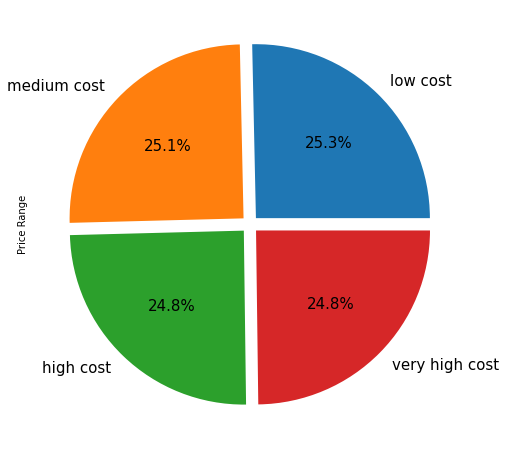

In [21]:
# Visualizing the Target variable's class distribution.

labels = ["low cost", "medium cost", "high cost", "very high cost"]
price_range_values.plot.pie(explode=[0.05]*4,labels=labels,autopct='%1.1f%%',figsize=(12,8),fontsize=15) 

##### 1. Why did you pick the specific chart?

**To find mobile price range distibution.**

##### 2. What is/are the insight(s) found from the chart?

**We can see that our target varibale is equally distributed.**

**Thus we don't have to worry about data imbalance and there is no need of oversampling or undersampling.Which is good for us.**

#### Chart - 2

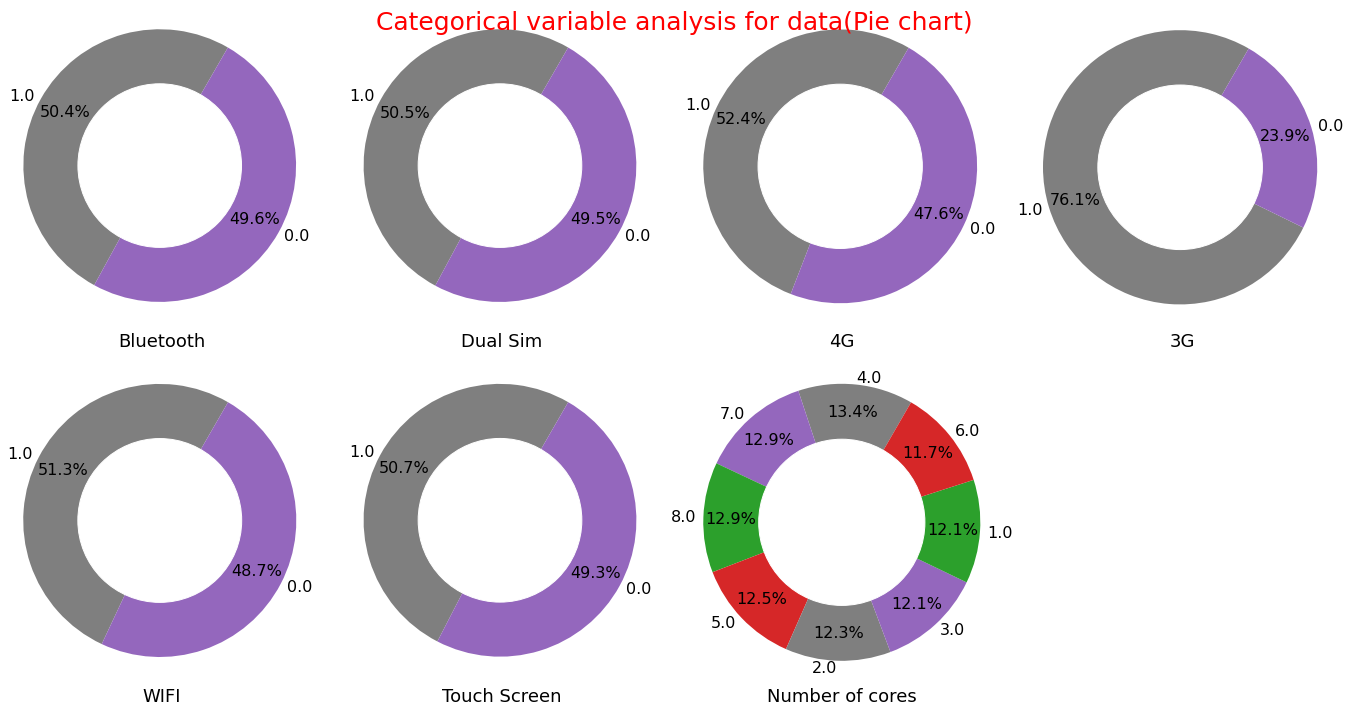

In [22]:
Cols = ['Bluetooth','Dual Sim','4G','3G','WIFI','Touch Screen','Number of cores']
''
plt.figure(figsize = [19,10])
plt.suptitle('Categorical variable analysis for data(Pie chart)\n', fontsize=25, c = 'red')
colors = ['C7','C4', 'C2', 'C3']
# T0 creat sets of Categorical Variables to analyize them
Cols = ['Bluetooth','Dual Sim','4G','3G','WIFI','Touch Screen','Number of cores']
i = 1
for col in Cols:
        plt.subplot(2,4,i)
        my_circle = plt.Circle((0, 0), 0.6, color='white')
        sizes = data[col].value_counts()
        d = plt.pie(sizes, colors = colors, labels = data[col].value_counts().index, autopct='%1.1f%%',
            startangle=60, pctdistance=0.8, labeldistance=1.05, textprops={'color':'black', 'fontsize' : 16})
        plt.axis('equal')
        plt.gca().add_artist(my_circle)
            
        plt.xlabel(col, size=18)
        
        i+=1 
            
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

**To find distribution of some specifications that mobiles have.**

##### 2. What is/are the insight(s) found from the chart?

**Percentage Distribution of Mobiles having bluetooth,dual sim, 4G,wifi and touchscreen are almost 50 %.**

**Very few mobiles(23.09%) dont have 3G connection.**

#### Chart - 3

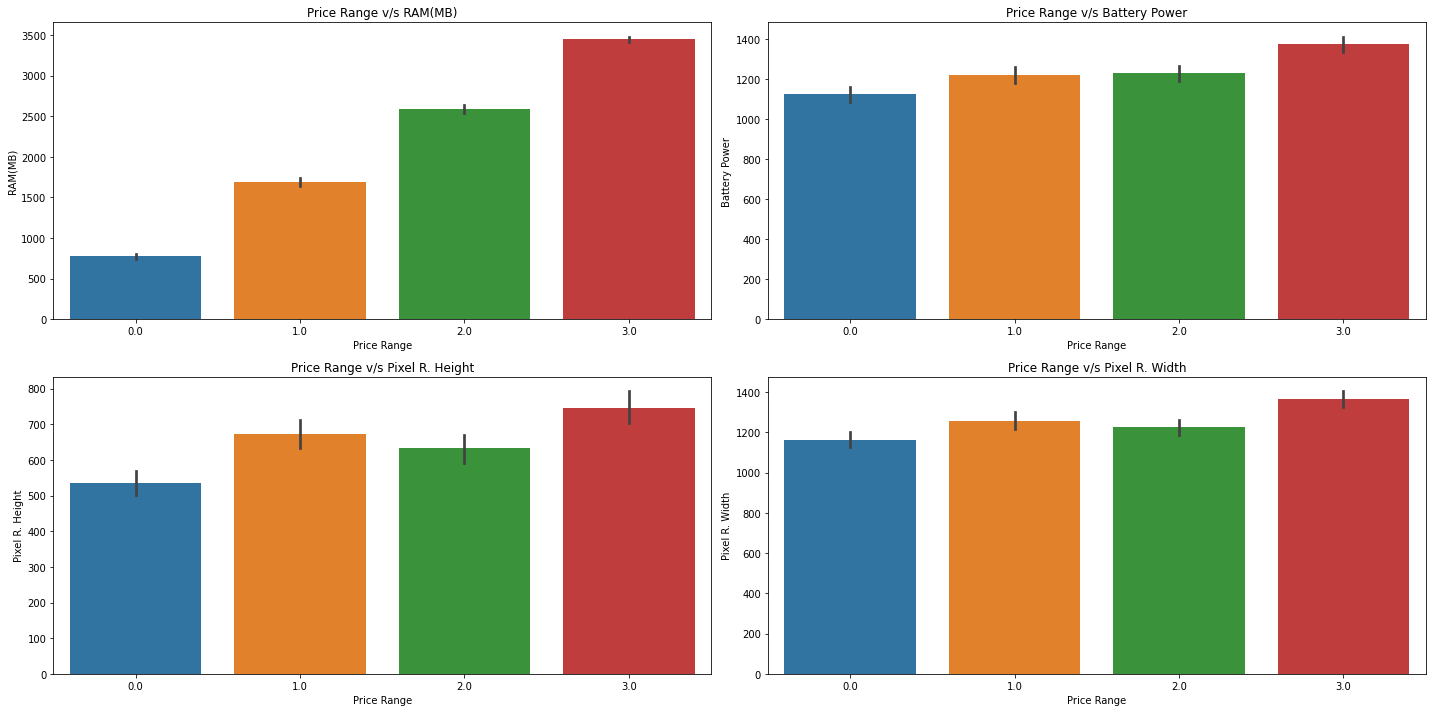

In [23]:
# Chart - 3 visualization code

# plotting  price_range vs other fearures
plt.figure(figsize=(20,10))

labels=['0=low_cost','1=medium_cost','2=high_cost','3=very_high_cost']

rows=2   
cols=2
counter=1

variables=['RAM(MB)','Battery Power','Pixel R. Height','Pixel R. Width']

for var in variables:
  plt.subplot(rows,cols,counter)
  sns.barplot(x = data['Price Range'], y = data[var])
  plt.title(f'Price Range v/s {var}')
  counter=counter+1
  plt.tight_layout()

##### 1. Why did you pick the specific chart?

**To find relation between some features and target variable**

##### 2. What is/are the insight(s) found from the chart?

* ***Mobiles having RAM more than 3000MB falls under Very high cost category.As RAM increases price range also increases.***
* ***Mobiles having RAM less than 1000 MB falls under low cost category.***
* ***Mobiles with battery power more than 1300 mAh has very high cost. And Mobiles with battery power between 1200 and 1300 mAH falls under medium and high cost category.***
* ***Mobiles with more than 700 pixel height and width more than 1300 has very high cost.***



#### Chart - 4

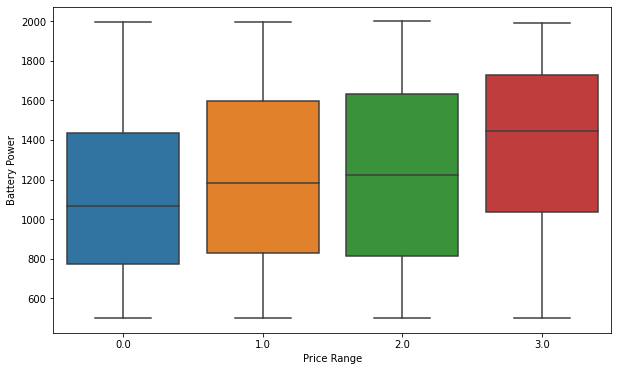

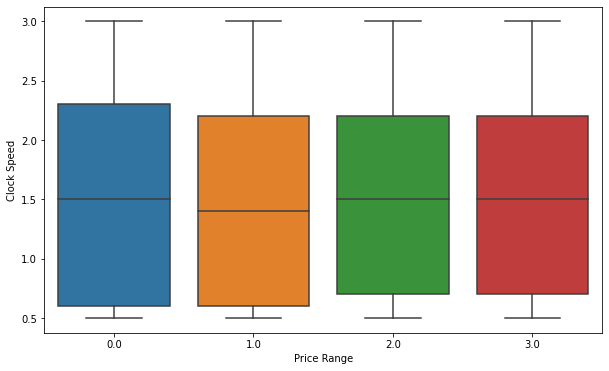

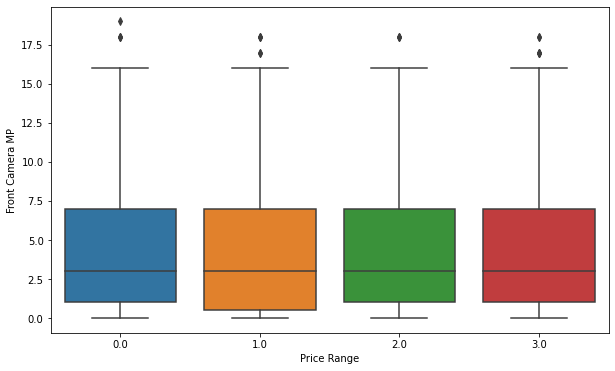

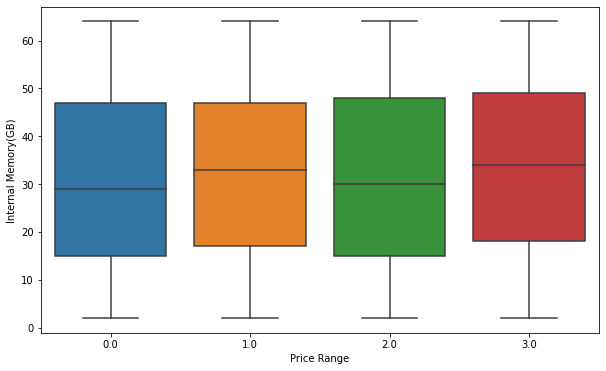

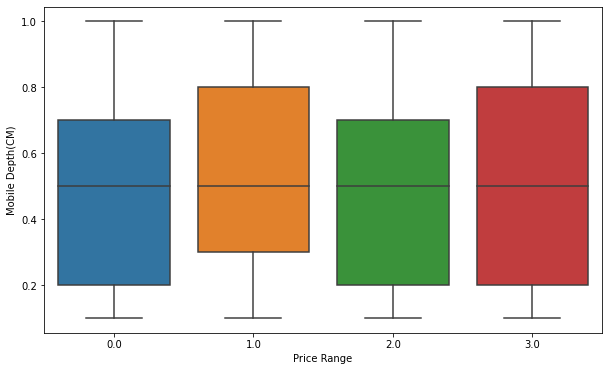

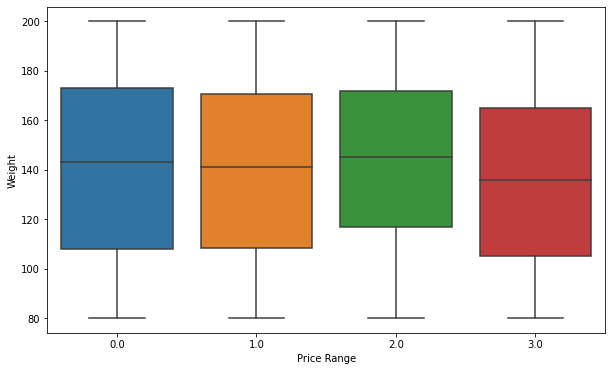

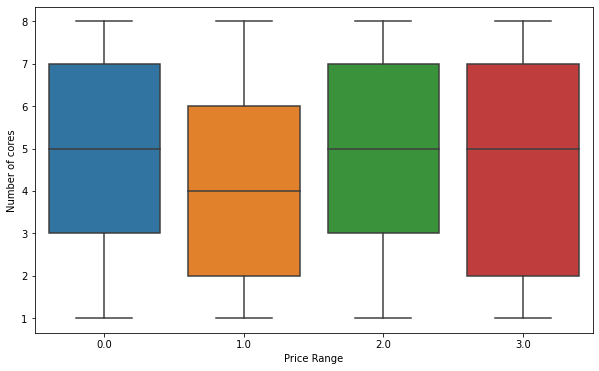

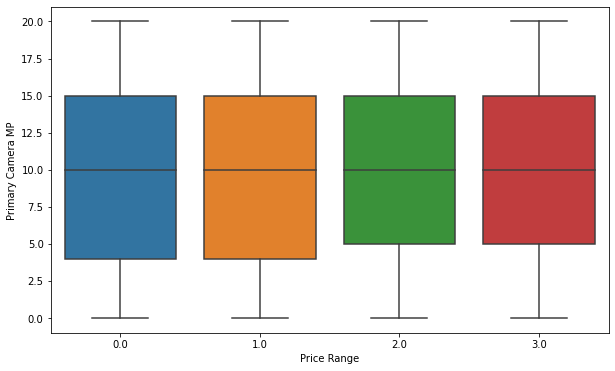

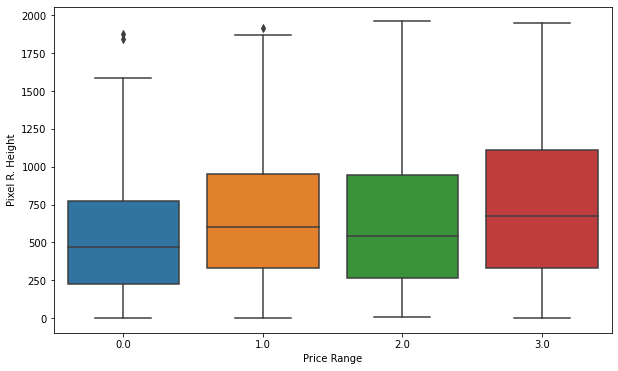

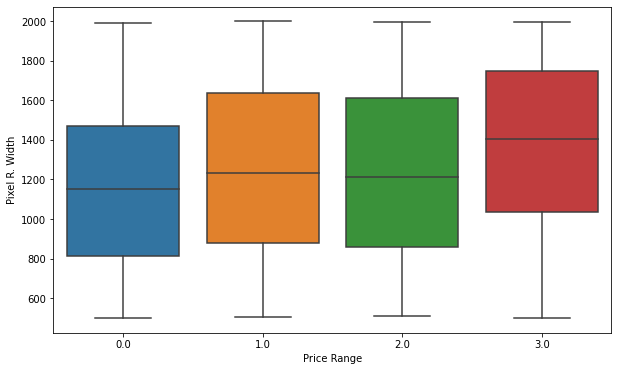

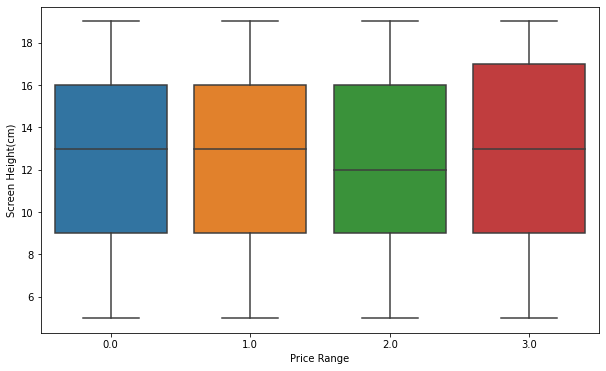

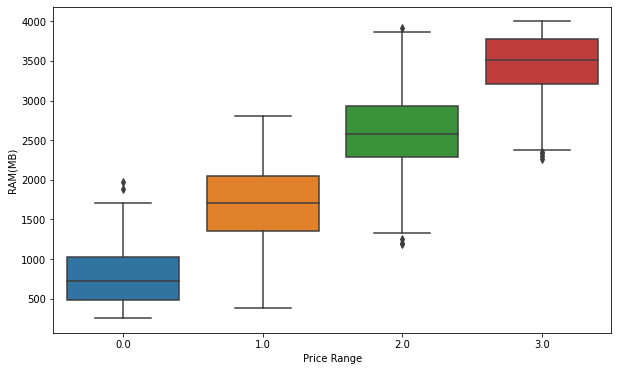

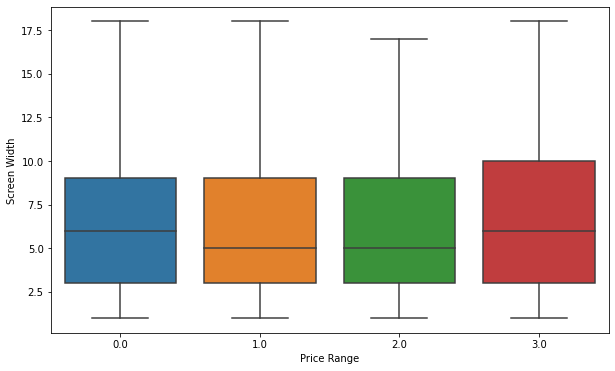

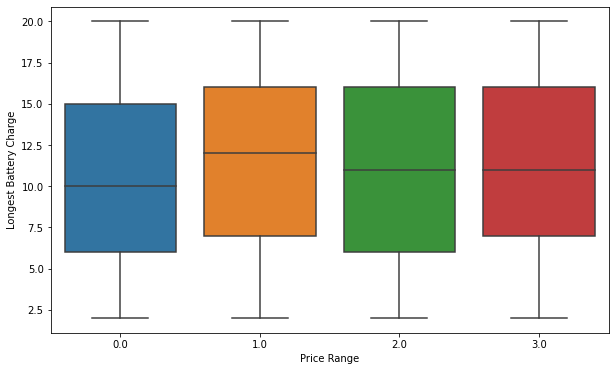

In [24]:
# Chart - 4 visualization code

list_1=['Battery Power','Clock Speed','Front Camera MP','Internal Memory(GB)','Mobile Depth(CM)','Weight','Number of cores','Primary Camera MP','Pixel R. Height','Pixel R. Width','Screen Height(cm)','RAM(MB)','Screen Width','Longest Battery Charge']
# plotting boXplot and distribution
counter=1
for var in list_1:
    plt.figure(figsize=(10,6))
    
    sns.boxplot(x= data['Price Range'],y = data[var])

##### 1. Why did you pick the specific chart?

**To understand how independent variabes affect dependent variable**

##### 2. What is/are the insight(s) found from the chart?

* **Most expensive mobiles have better batteries, but there isn't much diffrence betwwen 1 and 2 price categories.**
* **Least expensive mobiles have lowest clock speed.** 
* **mobiles that don't have front camera have medium price**
* **Size of memory is almost the same in all prices** 
* **Heviest mobiles have low cost**
* **Mobiles in diffrent prices, may have or not have primery camera.**
* **Very high cost mobiles have bigger px_height and px_width.**
* **By increasing the size of ram , price increase alot.**
* **Very high cost mobiles have bigger height and width in cm**

#### Chart - 5

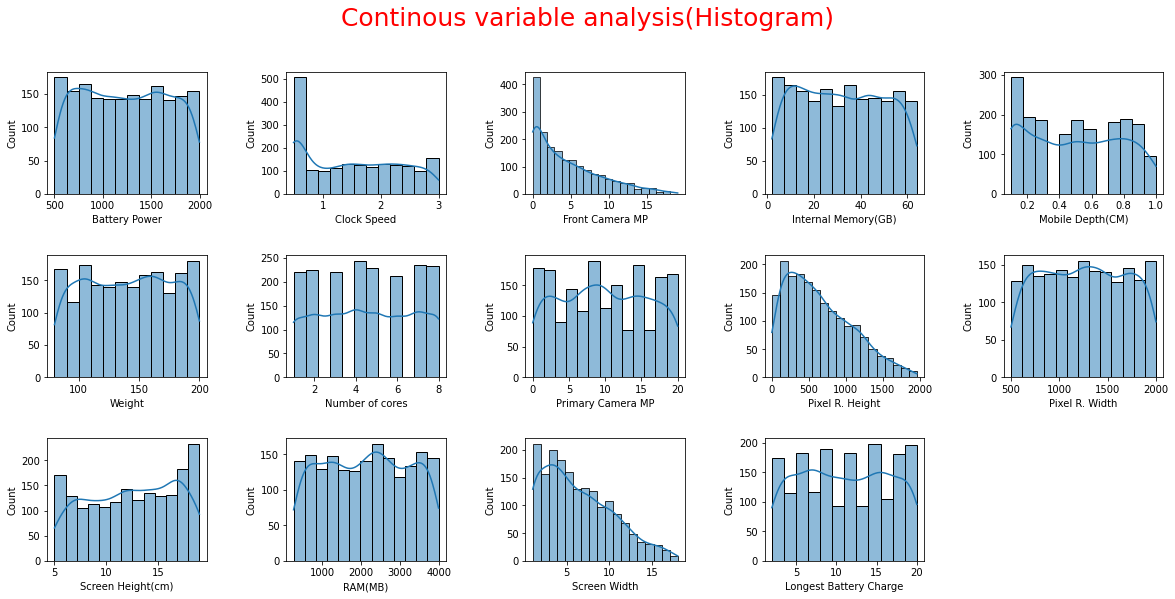

In [25]:
# Chart - 5 visualization code
plt.figure(1 , figsize = (20 , 9))
plt.suptitle('Continous variable analysis(Histogram)\n', fontsize=25, c = 'red')
i = 0 
for col in list_1:
    i += 1
    plt.subplot(3 , 5 , i)
    #plt.hist(df[col])
    sns.histplot(data[col], kde = True)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)

plt.show()

##### 2. What is/are the insight(s) found from the chart?

* **Most number of low cost mobiles, has battery power 750(mAh).**
* **Most number of very high cost mobiles, has battery power 1500-2000(mAh).**
* **Most of mobiles in all price range, has 0.5 clock speed.**
* **Most of mobiles in all price range, has front camera with 2 mega pixel.**
* **Most number of very high cost mobiles, has 250 pix_height.**
* **Most number of very high cost mobiles, has 1900 pix_width**
* **Most of mobiles in all price range, has 4 cm width.**

#### Chart - 6

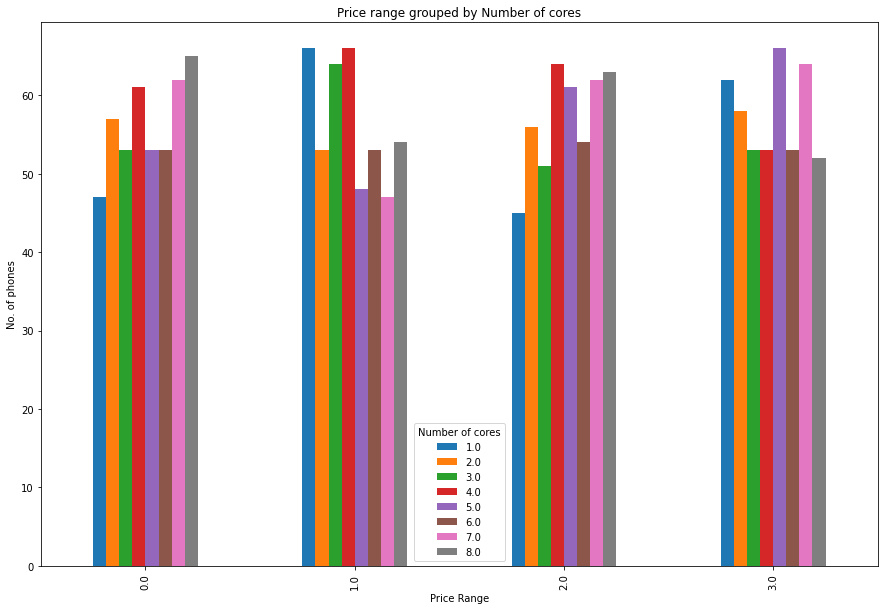

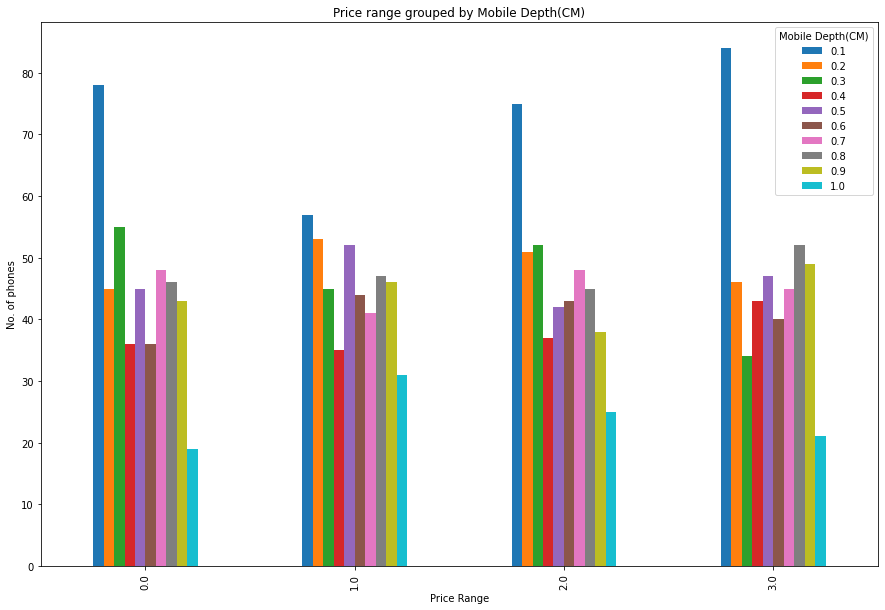

In [26]:
# Chart - 6 visualization code

list_2=['Number of cores','Mobile Depth(CM)']
for item in list_2:
  
  data.groupby(['Price Range'])[item].value_counts().unstack().plot.bar(figsize=(15,10))
  plt.title(f'Price range grouped by {item}')
  plt.ylabel('No. of phones')

##### 2. What is/are the insight(s) found from the chart?

* ***There are very few mobiles in price range 0 and 1 with lesser no of cores.***
* ***Most of the mobiles in price range 2 and 3 are with high no of cores.***

* ***Number of phones with less thickness is high and count of phones with high thickness is low.***

#### Chart - 7

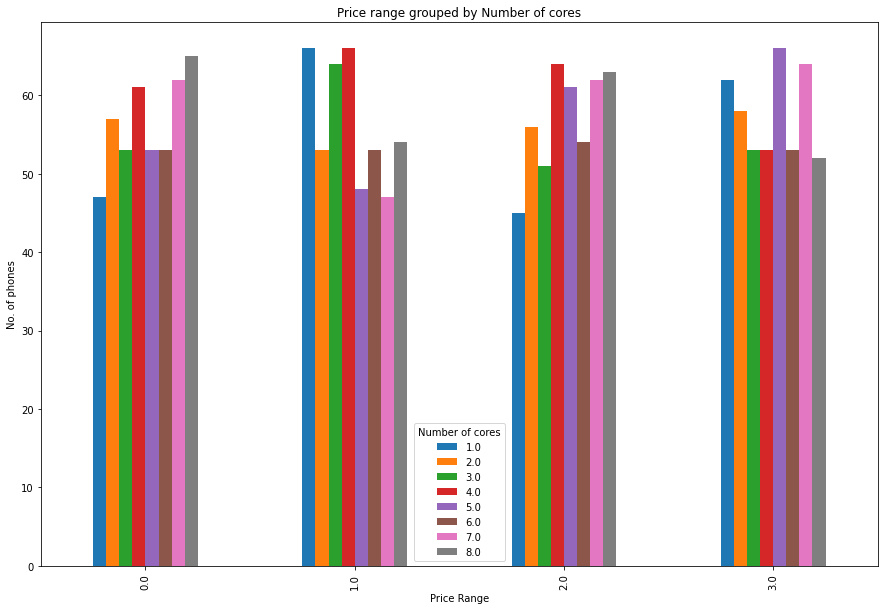

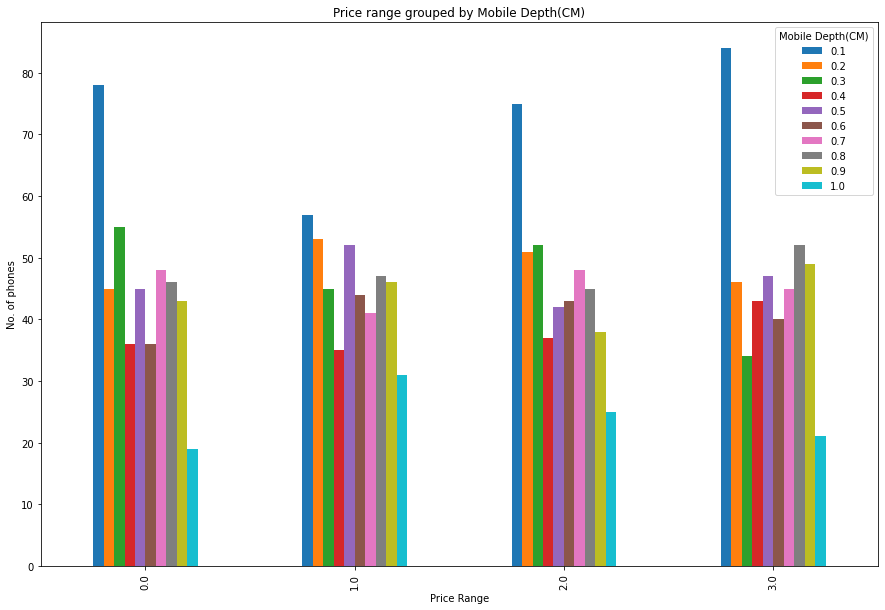

In [27]:
# Chart - 7 visualization code

list_2=['Number of cores','Mobile Depth(CM)']
for item in list_2:
  
  data.groupby(['Price Range'])[item].value_counts().unstack().plot.bar(figsize=(15,10))
  plt.title(f'Price range grouped by {item}')
  plt.ylabel('No. of phones')

In [28]:
three_G_mobiles = data[(data['3G']==1) & (data['4G']!=1)]

In [29]:
three_G_mobiles

,Battery Power,Bluetooth,Clock Speed,Dual Sim,Front Camera MP,4G,Internal Memory(GB),Mobile Depth(CM),Weight,Number of cores,Primary Camera MP,Pixel R. Height,Pixel R. Width,RAM(MB),Screen Height(cm),Screen Width,Longest Battery Charge,3G,Touch Screen,WIFI,Price Range
3,615.0,1.0,2.5,0.0,0.0,0.0,10.0,0.8,131.0,6.0,9.0,1216.0,1786.0,2769.0,16.0,8.0,11.0,1.0,0.0,0.0,2.0
5,1859.0,0.0,0.5,1.0,3.0,0.0,22.0,0.7,164.0,1.0,7.0,1004.0,1654.0,1067.0,17.0,1.0,10.0,1.0,0.0,0.0,1.0
7,1954.0,0.0,0.5,1.0,0.0,0.0,24.0,0.8,187.0,4.0,0.0,512.0,1149.0,700.0,16.0,3.0,5.0,1.0,1.0,1.0,0.0
8,1445.0,1.0,0.5,0.0,0.0,0.0,53.0,0.7,174.0,7.0,14.0,386.0,836.0,1099.0,17.0,1.0,20.0,1.0,0.0,0.0,0.0
12,803.0,1.0,2.1,0.0,7.0,0.0,17.0,1.0,198.0,4.0,11.0,344.0,1440.0,2680.0,7.0,1.0,4.0,1.0,0.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1804,1829.0,1.0,2.1,0.0,8.0,0.0,59.0,0.1,91.0,5.0,15.0,1457.0,1919.0,3142.0,16.0,6.0,5.0,1.0,1.0,1.0,3.0
1811,674.0,1.0,2.9,1.0,1.0,0.0,21.0,0.2,198.0,3.0,4.0,576.0,1809.0,1180.0,6.0,3.0,4.0,1.0,1.0,1.0,0.0
1812,1467.0,1.0,0.5,0.0,0.0,0.0,18.0,0.6,122.0,5.0,0.0,888.0,1099.0,3962.0,15.0,11.0,5.0,1.0,1.0,1.0,3.0
1813,858.0,0.0,2.2,0.0,1.0,0.0,50.0,0.1,84.0,1.0,2.0,528.0,1416.0,3978.0,17.0,16.0,3.0,1.0,1.0,0.0,3.0


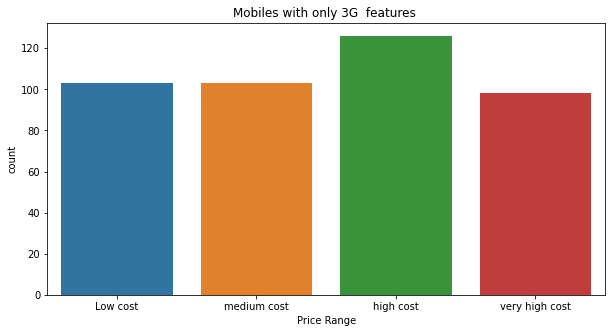

In [30]:
# Chart - 6 visualization code
plt.figure(figsize=(10,5))
sns.countplot(three_G_mobiles['Price Range'])
plt.xticks(ticks=[0,1,2,3],labels=['Low cost','medium cost','high cost','very high cost'])
plt.title("Mobiles with only 3G  features ")
plt.show()

##### 1. Why did you pick the specific chart?

***To find how 3G feature affect price of mobile***

##### 2. What is/are the insight(s) found from the chart?

* ***Mobiles which has very high cost are very less likely to have 3G.***
* ***There are more chances that high cost mobile will have 3G in it.***

#### Chart - 8

In [31]:
# Chart - 8 visualization code
#data[(data['3G']==1) & (data['4G']!=1)]
four_G_mobiles = data[(data['4G']==1)]

In [32]:
data['4G'].value_counts()

1.0    954
0.0    865
Name: 4G, dtype: int64

In [33]:
four_G_mobiles

,Battery Power,Bluetooth,Clock Speed,Dual Sim,Front Camera MP,4G,Internal Memory(GB),Mobile Depth(CM),Weight,Number of cores,Primary Camera MP,Pixel R. Height,Pixel R. Width,RAM(MB),Screen Height(cm),Screen Width,Longest Battery Charge,3G,Touch Screen,WIFI,Price Range
1,1021.0,1.0,0.5,1.0,0.0,1.0,53.0,0.7,136.0,3.0,6.0,905.0,1988.0,2631.0,17.0,3.0,7.0,1.0,1.0,0.0,2.0
2,563.0,1.0,0.5,1.0,2.0,1.0,41.0,0.9,145.0,5.0,6.0,1263.0,1716.0,2603.0,11.0,2.0,9.0,1.0,1.0,0.0,2.0
4,1821.0,1.0,1.2,0.0,13.0,1.0,44.0,0.6,141.0,2.0,14.0,1208.0,1212.0,1411.0,8.0,2.0,15.0,1.0,1.0,0.0,1.0
6,1821.0,0.0,1.7,0.0,4.0,1.0,10.0,0.8,139.0,8.0,10.0,381.0,1018.0,3220.0,13.0,8.0,18.0,1.0,0.0,1.0,3.0
9,509.0,1.0,0.6,1.0,2.0,1.0,9.0,0.1,93.0,5.0,15.0,1137.0,1224.0,513.0,19.0,10.0,12.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1810,1882.0,0.0,2.0,0.0,11.0,1.0,44.0,0.8,113.0,8.0,19.0,4.0,743.0,3579.0,19.0,8.0,20.0,1.0,1.0,0.0,3.0
1814,794.0,1.0,0.5,1.0,0.0,1.0,2.0,0.8,106.0,6.0,14.0,1222.0,1890.0,668.0,13.0,4.0,19.0,1.0,1.0,0.0,0.0
1816,1911.0,0.0,0.9,1.0,1.0,1.0,36.0,0.7,108.0,8.0,3.0,868.0,1632.0,3057.0,9.0,1.0,5.0,1.0,1.0,0.0,3.0
1817,1512.0,0.0,0.9,0.0,4.0,1.0,46.0,0.1,145.0,5.0,5.0,336.0,670.0,869.0,18.0,10.0,19.0,1.0,1.0,1.0,0.0


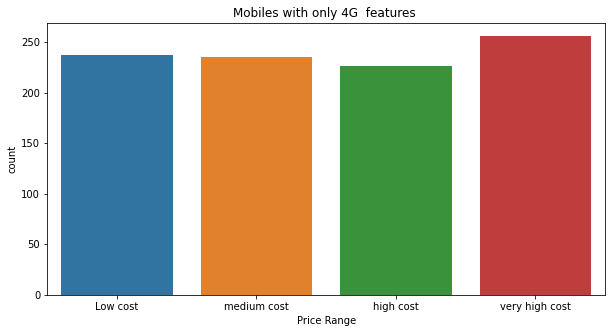

In [34]:
plt.figure(figsize=(10,5))
sns.countplot(four_G_mobiles['Price Range'])
plt.xticks(ticks=[0,1,2,3],labels=['Low cost','medium cost','high cost','very high cost'])
plt.title("Mobiles with only 4G  features ")
plt.show()

##### 1. Why did you pick the specific chart?

***To find how 4G feature affect price of mobile***

##### 2. What is/are the insight(s) found from the chart?

* ***Mobiles which has very high cost are very likely to have 4G.***
* ***There are less chances that high cost mobile will have 4G in it.***

#### Chart - 9

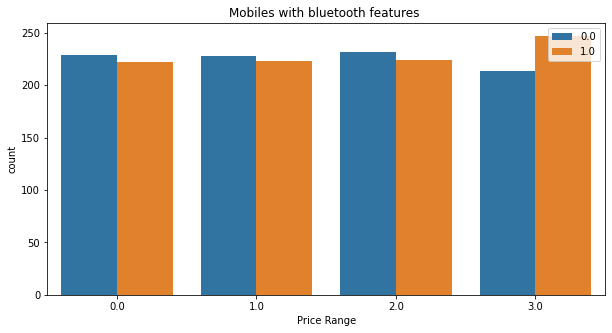

In [35]:
# Chart - 9 visualization code

plt.figure(figsize=(10, 5))
sns.countplot( data['Price Range'], hue = data['Bluetooth'])
plt.title("Mobiles with bluetooth features ")
plt.legend(loc='best')

##### 1. Why did you pick the specific chart?

* **To find which price range mobile has bluetooth service**

##### 2. What is/are the insight(s) found from the chart?

* ***Majority of phones of price range from 0 to 2 dont have bluetooth on other hand price range of 3 have bluetooth service.***

#### Chart - 10

In [36]:
# Chart - 10 visualization code

numeric_col=['Battery Power','Clock Speed','Front Camera MP','Internal Memory(GB)','Mobile Depth(CM)','Weight','Number of cores','Primary Camera MP','Pixel R. Height',
             'Pixel R. Width', 'RAM(MB)', 'Screen Height(cm)', 'Screen Width', 'Longest Battery Charge',]

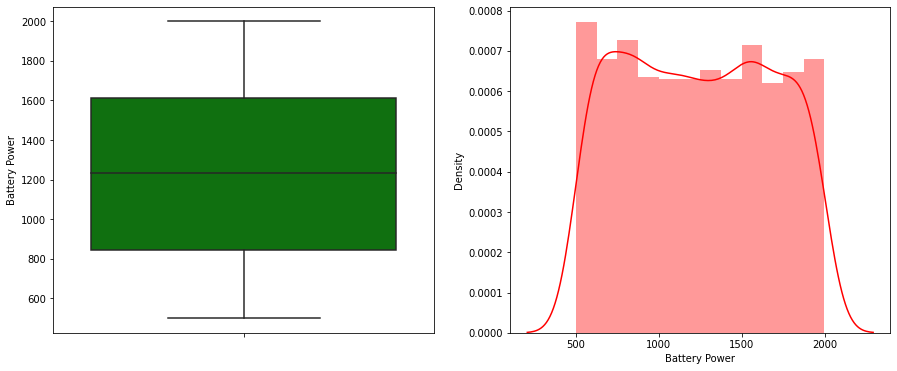

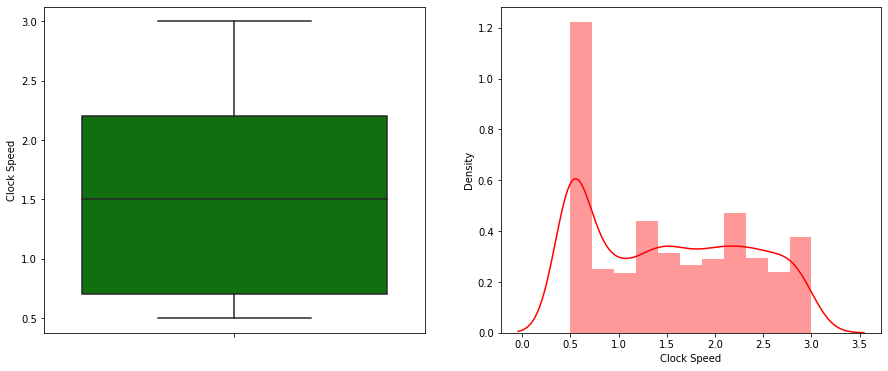

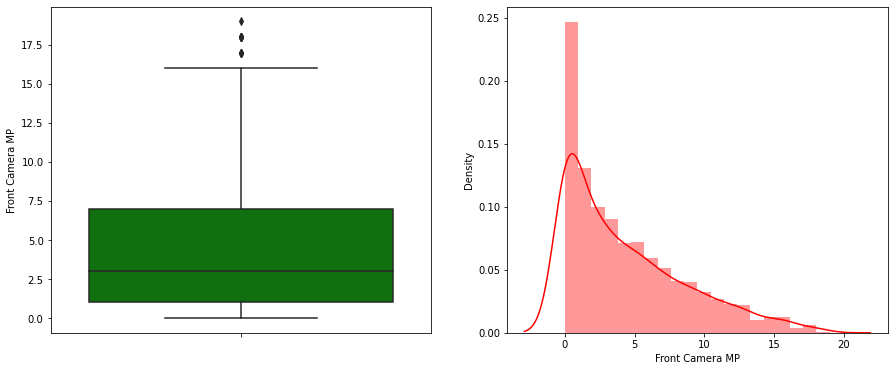

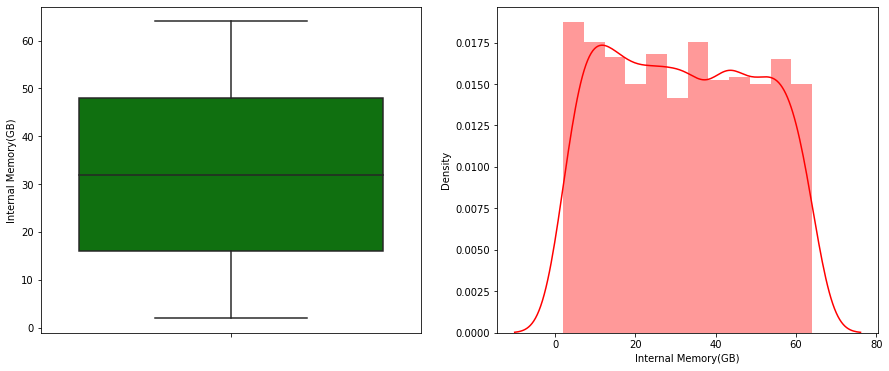

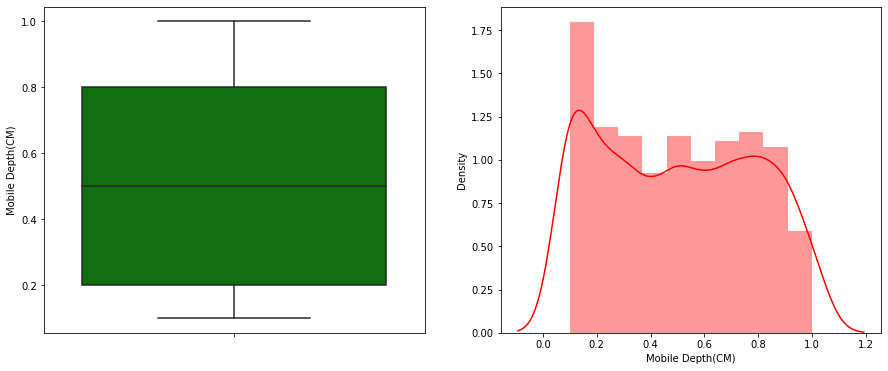

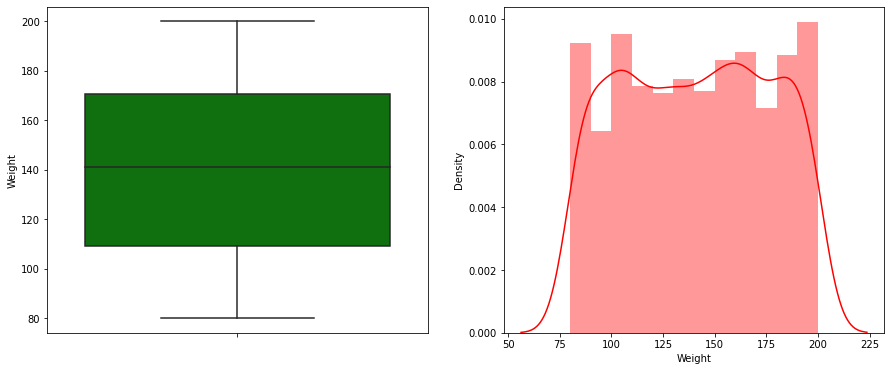

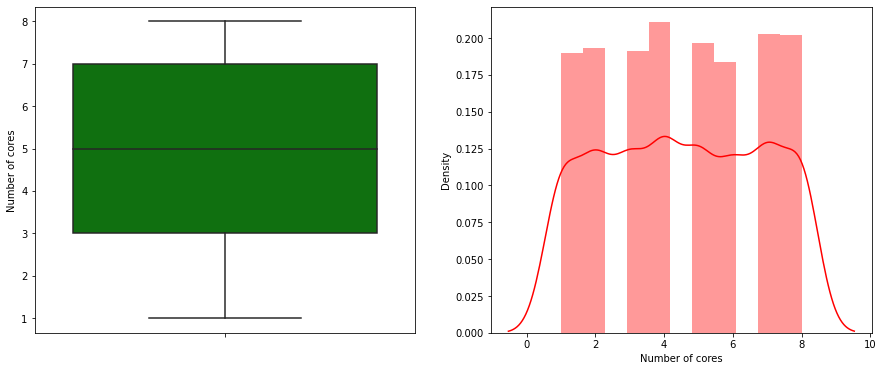

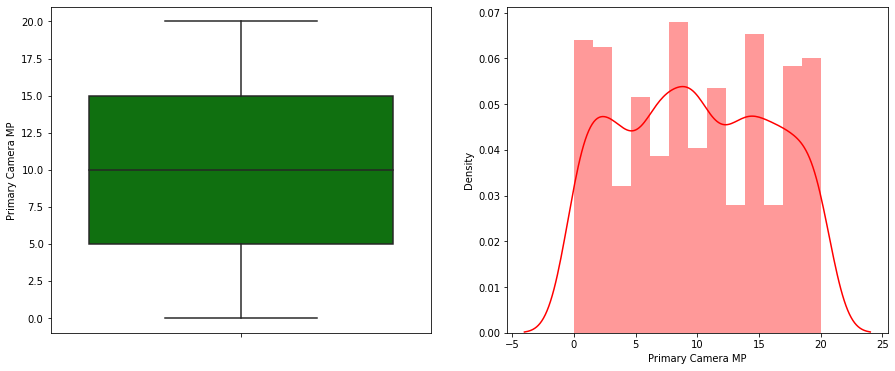

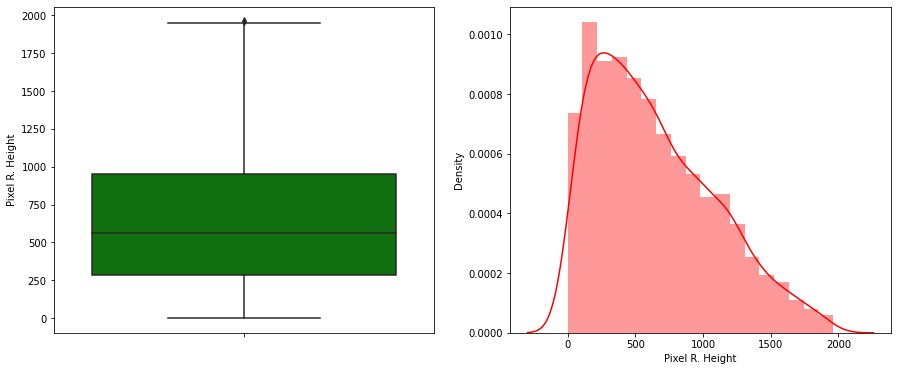

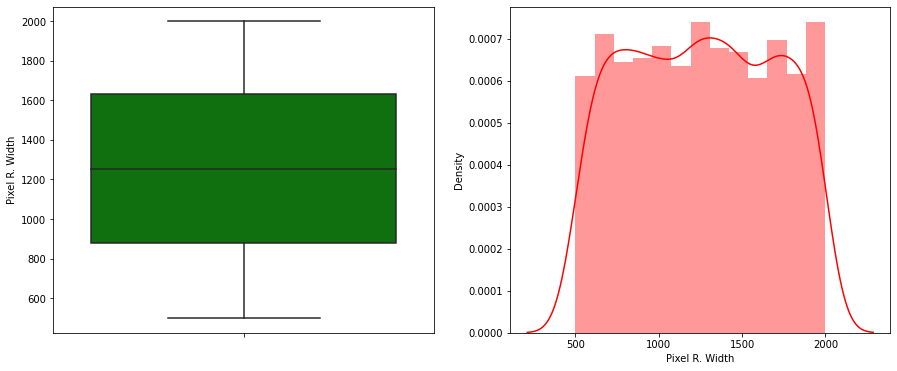

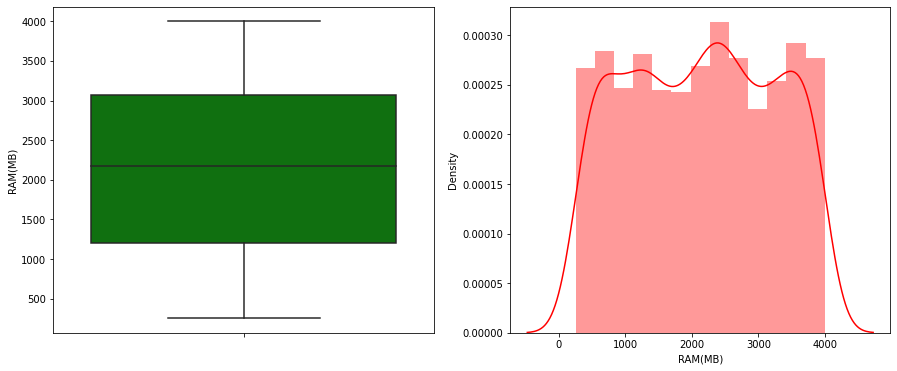

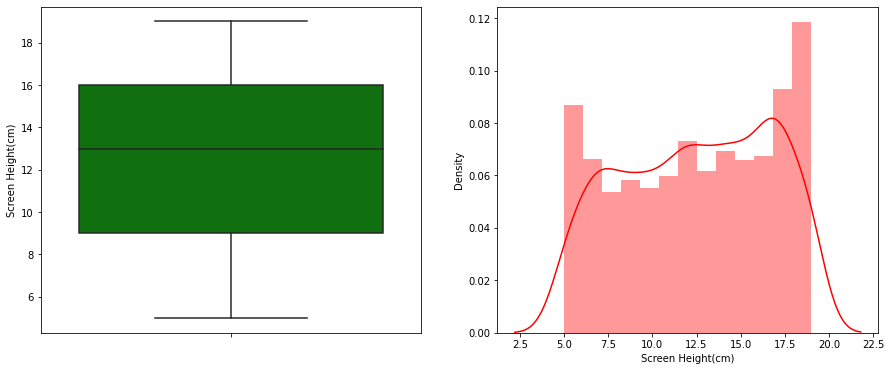

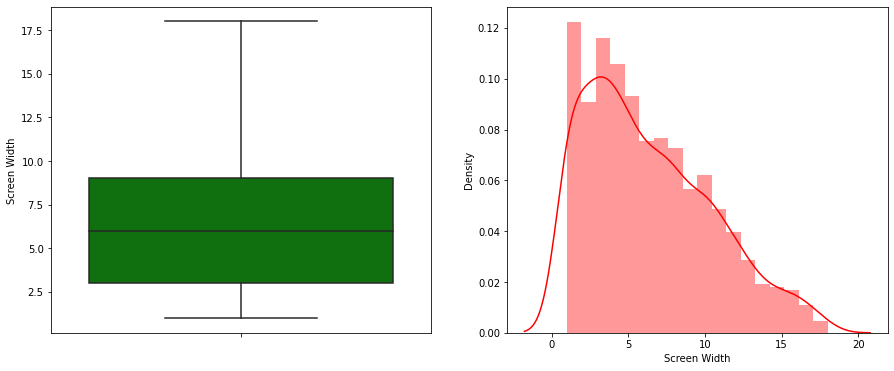

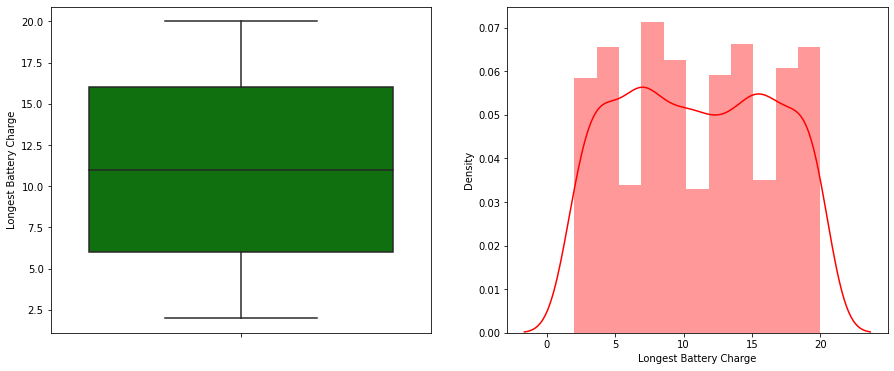

In [37]:
# plotting boXplot and distribution
for var in numeric_col:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y = data[var],color='green')
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot( data[var],color= 'red')
    
    fig.set_xlabel(var)

    plt.show()

##### 1. Why did you pick the specific chart?

* **To find distribution of independant variables**

##### 2. What is/are the insight(s) found from the chart?

* **Data is well distrubted, no imbalance in data**
* **"Front Camera MP" and "Pixel R. Height" has some outliers.**

#### Chart - 11 - Correlation Heatmap 

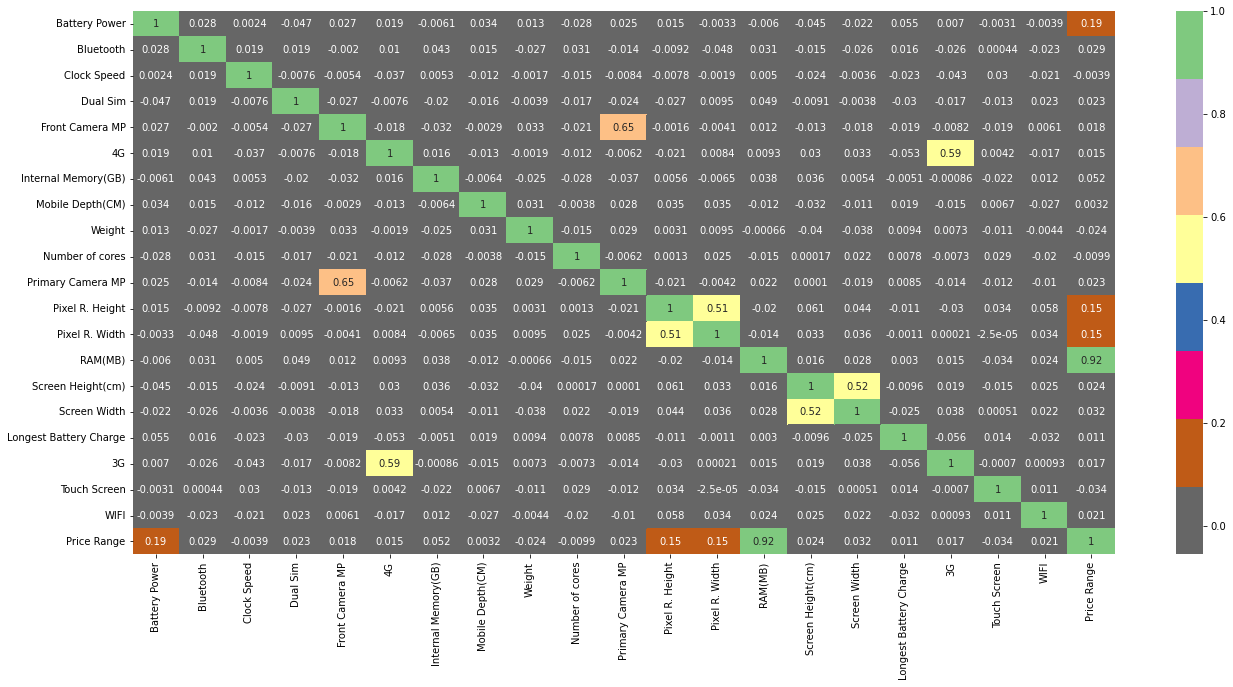

In [38]:
# Correlation Heatmap visualization code

plt.figure(figsize=(22,10))
#get correlations of each features in dataset
sns.heatmap(data.corr(), annot=True, cmap=plt.cm.Accent_r)

##### 1. Why did you pick the specific chart?

* **To find co-relation between data**

##### 2. What is/are the insight(s) found from the chart?

* **The most influential variable is ram**

* **Most of the variables have very little correlation to price range**

* **Primary camera mega pixels and front Camera mega pixels have correlation (it make sense because both of them reflect technology level of resolution of the related phone model) but they do not effect prige range.**

* **Having 3G and 4G is somewhat correlated**

* **There is no highly correlated inputs in our dataset, so there is no multicollinearity problem.**

#### Chart - 13 - Pair Plot 

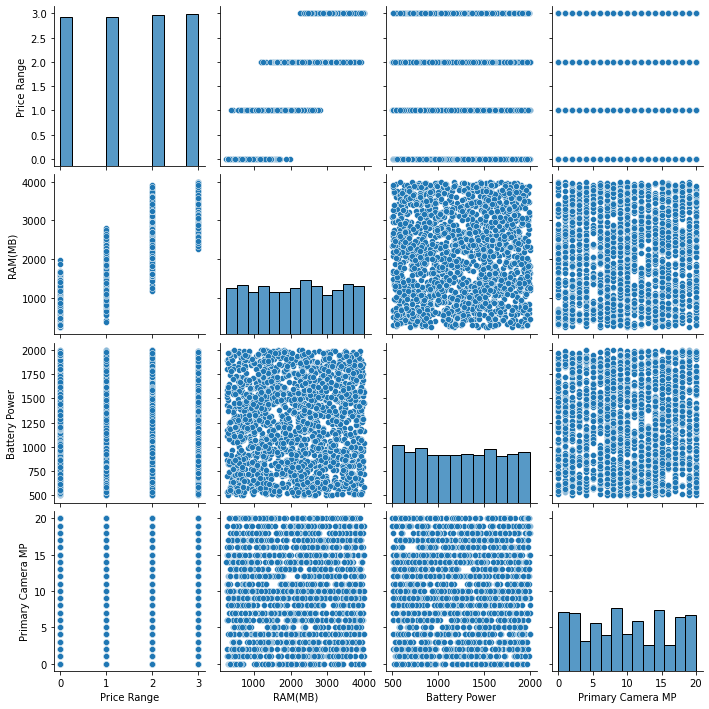

In [39]:
# Pair Plot visualization code

#sns.pairplot(rossmannstore_df,hue ='day')
#plt.show()

Plot=data[['Price Range','RAM(MB)', 'Battery Power','Primary Camera MP']]
sns.pairplot(Plot)
plt.show()

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Outliers

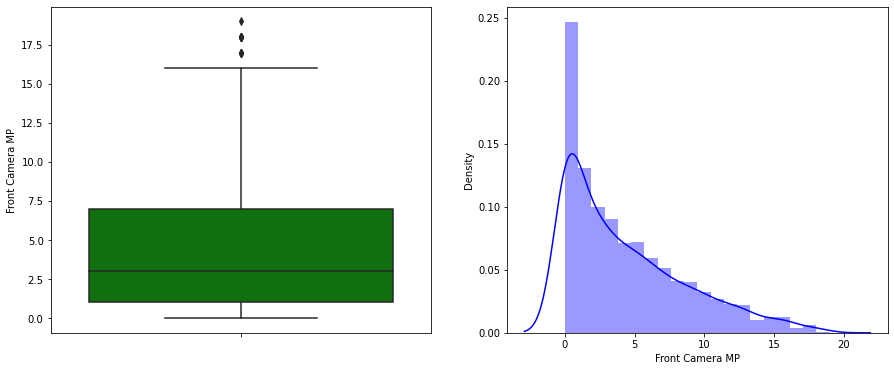

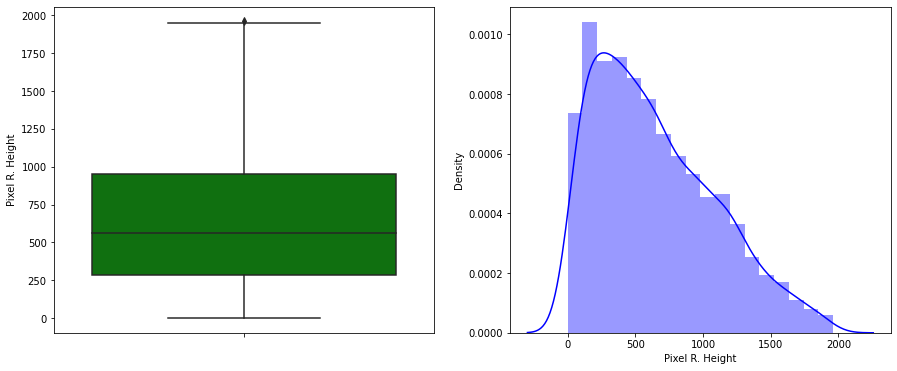

In [40]:
# Handling Outliers & Outlier treatments
# We can see some outliers in 'Front Camera MP','Pixel R. Height'.

for var in ['Front Camera MP','Pixel R. Height']:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=data[var],color='green')
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(data[var],color='blue')
    
    fig.set_xlabel(var)

    plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

* **The boxplots gave an insight that there are outliers in Front Camera MP and Pixel R. Height but we won't treat any value as outlier here because somewhat these values seems to be realistically to have in different kinds of mobiles available in the market.** 

### 2. Feature Selection

#### 1. Feature Selection

In [41]:
# Select your features wisely to avoid overfitting
# Separating X variables(indpendent variables) and Y(dependent variable) variable.
X= data.drop('Price Range',axis=1)
y= data["Price Range"]

In [42]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#Now we Will select the top 12 important features

bestfeatures = SelectKBest(score_func=chi2, k=12)
fit = bestfeatures.fit(X,y)

In [43]:
# creating score's and column's dataframe
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [44]:
# concatenating above two dataframes
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specifications','Score']

In [45]:
# Check dataframe
featureScores

,Specifications,Score
0,Battery Power,11813.057620
1,Bluetooth,1.277757
2,Clock Speed,0.821798
3,Dual Sim,1.014912
4,Front Camera MP,5.633428
5,4G,1.571115
6,Internal Memory(GB),86.106030
7,Mobile Depth(CM),0.612282
8,Weight,84.411610
9,Number of cores,8.707756


In [46]:
# 12 features with highest chi squared statistic 
print(featureScores.nlargest(12,'Score'))

            Specifications          Score
13                 RAM(MB)  847649.917316
11         Pixel R. Height   16286.499079
0            Battery Power   11813.057620
12          Pixel R. Width    7911.445985
6      Internal Memory(GB)      86.106030
8                   Weight      84.411610
15            Screen Width      10.329824
16  Longest Battery Charge      10.221309
9          Number of cores       8.707756
14       Screen Height(cm)       6.977019
4          Front Camera MP       5.633428
10       Primary Camera MP       3.764263


In [47]:
# 12 features with highest chi squared statistic are selected as independent variables.
X = data[['RAM(MB)','Pixel R. Height','Battery Power','Pixel R. Width','Weight','Internal Memory(GB)','Front Camera MP','Screen Height(cm)','Longest Battery Charge','Screen Width','Number of cores','Primary Camera MP']]

# dependent varaible
y = data['Price Range']


##### What all feature selection methods have you used  and why?

* **We import the SelectKBest to find the best feture for classification**

##### Which all features you found important and why?

* **We select the features give best scores after using SelectKBest by sklearn.featureselection library**

### 2. Data Spilting

In [48]:
# splitting the data into Train and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1364, 12)
(455, 12)
(1364,)
(455,)


### 3. Data Transformation

In [49]:
# Scaling the data.
# creating an object of MinMax Scaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)   # fitting the X_train
X_test_scaled=scaler.transform(X_test)         # transforming X_test

* **To transform data we have use the StandardScaler method**

In [50]:
# Defining a fucnction for plotting roc curve
def plot_Auc_roc(y_test,pred_prob):
  '''It will take y_test and y predicted probabilities
  as input and will plot the roc curve.'''

  fpr = {}
  tpr = {}
  thresh ={}

  n_class = 4

  for i in range(n_class):    
      fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
      
  # plotting    
  plt.figure(figsize=(12,8))
  plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label= ((f'Class 0(Low cost) vs Rest, AUC= {round(auc(fpr[0],tpr[0]),4)}')))
  plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label=((f'Class 1(Medium cost) vs Rest, AUC= {round(auc(fpr[1],tpr[1]),4)}')))
  plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label=((f'Class 2(High cost) vs Rest, AUC= {round(auc(fpr[2],tpr[2]),4)}')))
  plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label=((f'Class 3(Very High cost) vs Rest, AUC= {round(auc(fpr[3],tpr[3]),4)}')))
  plt.title('Multiclass ROC curve')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive rate')
  plt.legend(loc='best')
  plt.savefig('Multiclass ROC',dpi=300);

In [51]:
#creating a class list
Class_cat = ['low cost','medium cost', 'high cost', 'very high cost']

## ***7. ML Model Implementation***

### ML Model - 1 Decision Tree Classifier

In [52]:
# ML Model - 1 Implementation
# Creating object of the decision tree.

dtc=DecisionTreeClassifier(random_state=0)

# Fit the Algorithm
dtc.fit(X_train,y_train)

# Predict on the model
y_train_pred=dtc.predict(X_train)
y_pred=dtc.predict(X_test)

In [53]:
print('Train set Accuracy: ' )
print(accuracy_score(y_train,y_train_pred))
print('_____________________________________\n')

print('Test set Accuracy:')
print(accuracy_score(y_test,y_pred))

Train set Accuracy: 
1.0
_____________________________________

Test set Accuracy:
0.832967032967033


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

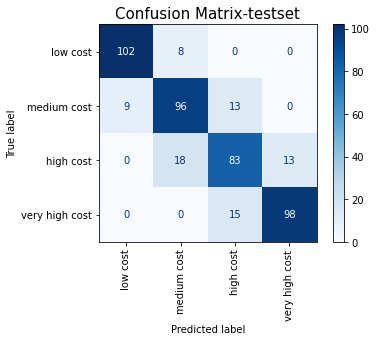

In [54]:
# Visualizing evaluation Metric Score chart
# plotting confusion matrix for test set.
plot_confusion_matrix(dtc,X_test,y_test,cmap='Blues',display_labels=Class_cat,xticks_rotation='vertical')
plt.grid(False)
plt.title('Confusion Matrix-testset',fontsize=15)
plt.show()

In [55]:
# Printing classification of train set.
print('Classification Report:\n\n',classification_report(y_train,y_train_pred))

Classification Report:

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       341
         1.0       1.00      1.00      1.00       333
         2.0       1.00      1.00      1.00       342
         3.0       1.00      1.00      1.00       348

    accuracy                           1.00      1364
   macro avg       1.00      1.00      1.00      1364
weighted avg       1.00      1.00      1.00      1364



In [56]:
# printing classification of test set.
print('Classification Report:\n\n',classification_report(y_test,y_pred))

Classification Report:

               precision    recall  f1-score   support

         0.0       0.92      0.93      0.92       110
         1.0       0.79      0.81      0.80       118
         2.0       0.75      0.73      0.74       114
         3.0       0.88      0.87      0.88       113

    accuracy                           0.83       455
   macro avg       0.83      0.83      0.83       455
weighted avg       0.83      0.83      0.83       455



* ***Train set accuracy is 100% and test accuracy is 83%.***
* ***Model is overfitted on train set and did not generalised well.***
* ***We will tune hyperparamters to reduce overfitting and try to imporve the model performance.***

#### 2. Cross- Validation & Hyperparameter Tuning

In [57]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
dtc_= DecisionTreeClassifier(random_state=0)

grid_values={'criterion':['gini','entropy'],
             'max_depth':[2,3,4,5,6,9,10,11,12,13,14,15],
             'splitter':['best','random'],
             'min_samples_split':[3,5,10],
             'max_features':['auto','sqrt','log2',None]}


# Fit the Algorithm

dtc_tune=GridSearchCV(dtc_,param_grid=grid_values,cv=5,scoring='accuracy',verbose=3)
dtc_tune.fit(X_train,y_train)   # model fitting.


Fitting 5 folds for each of 576 candidates, totalling 2880 fits
[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.286 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.289 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.319 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.278 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.294 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=random;, score=0.300 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=random;, score=0.249 total time=   0.0s
[CV 3/5] END criterion=gini, 

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 9, 10, 11, 12, 13, 14,
                                       15],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_split': [3, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=3)

In [58]:
# getting best parameters for model.
print(dtc_tune.best_params_)

# getting best estimators
print(dtc_tune.best_estimator_)

{'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_split': 10, 'splitter': 'best'}
DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=10,
                       random_state=0)


In [59]:
# using best parameters and training the the data.
dtc_optimal=DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=10,
                       random_state=0)
dtc_optimal.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=10,
                       random_state=0)

In [60]:
# Predict on the model
y_train_pred=dtc_optimal.predict(X_train)
y_pred=dtc_optimal.predict(X_test)

In [61]:
# Accuracy
print('Train set Accuracy: ' )
print(accuracy_score(y_train,y_train_pred))
print('_____________________________________\n')

print('Test set Accuracy:')
print(accuracy_score(y_test,y_pred))

Train set Accuracy: 
0.9633431085043989
_____________________________________

Test set Accuracy:
0.8615384615384616


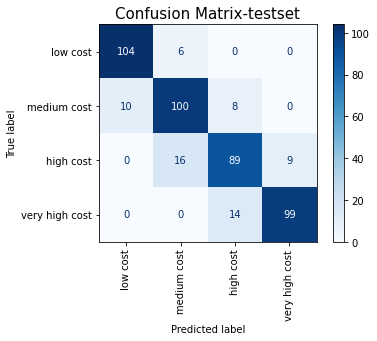

In [62]:
# plotting confusion matrix for test set.
plot_confusion_matrix(dtc_optimal,X_test,y_test,cmap='Blues',display_labels=Class_cat,xticks_rotation='vertical')
plt.grid(False)
plt.title('Confusion Matrix-testset',fontsize=15)
plt.show()

In [63]:
# printing classification report for train set.
print('Classification Report:\n\n',classification_report(y_train,y_train_pred))

Classification Report:

               precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       341
         1.0       0.98      0.94      0.96       333
         2.0       0.93      0.97      0.95       342
         3.0       0.98      0.95      0.96       348

    accuracy                           0.96      1364
   macro avg       0.96      0.96      0.96      1364
weighted avg       0.96      0.96      0.96      1364



In [64]:
# printing classification report for test set.
print('Classification Report:\n\n',classification_report(y_test,y_pred))

Classification Report:

               precision    recall  f1-score   support

         0.0       0.91      0.95      0.93       110
         1.0       0.82      0.85      0.83       118
         2.0       0.80      0.78      0.79       114
         3.0       0.92      0.88      0.90       113

    accuracy                           0.86       455
   macro avg       0.86      0.86      0.86       455
weighted avg       0.86      0.86      0.86       455



In [65]:
# creating a function for plotting the feature importances.
def plot_feature_importance(algo):
  ''' Takes the alogorithm as input and 
  plots the feature importance graph'''
  
  # get importance
  importance = algo.feature_importances_
  feat_importance=pd.DataFrame({'Features':X.columns,'score':importance}).sort_values(by='score',ascending=False)
  plt.figure(figsize=(10,8))
  sns.barplot(x=feat_importance['score'],y=feat_importance['Features'])
  plt.title('Feature Importance')

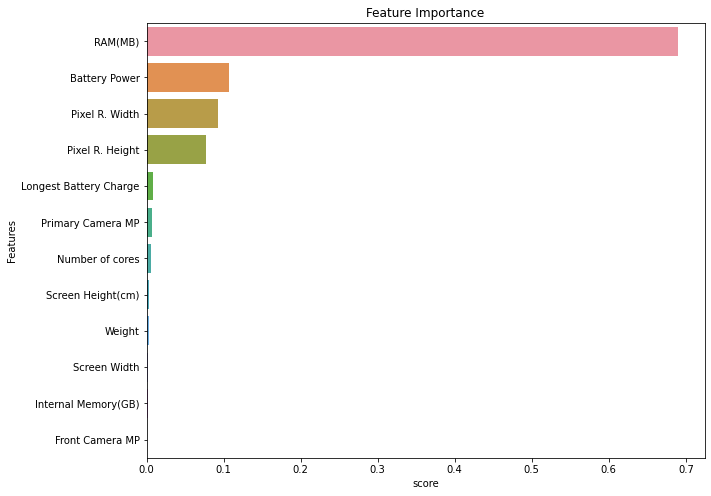

In [66]:
#plotting feature importances
plot_feature_importance(dtc_optimal)

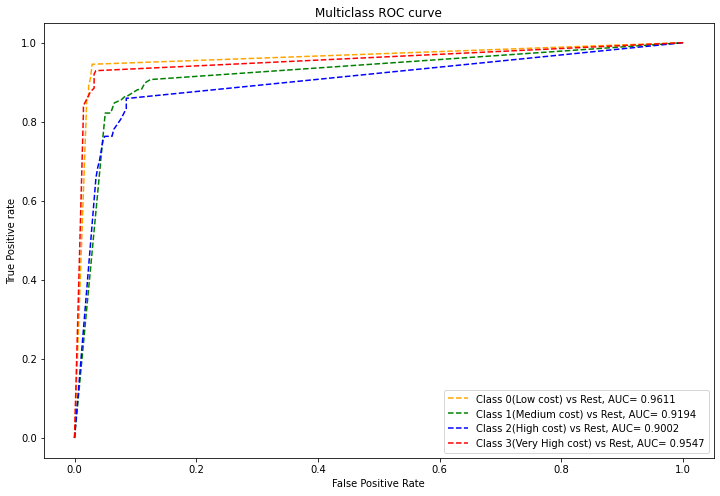

In [67]:
# Plot AUC ROC curve.
pred_prob = dtc_optimal.predict_proba(X_test)
plot_Auc_roc(y_test,pred_prob)

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

* ***Train accuarcy has been reduced to 96% from 100% and test accuarcy is 86% . Thus we somewhat reduced the overfiiting by reducing the training accuarcy. However this will not be good model for us.***

* ***'RAM(MB)','Battery Power','Pixel R. Height' and 'Pixel R. Width' came out to be the most important featrures***
* ***This model classified the class 0 and class 3 very nicely as we can see the AUC is almost 0.96 for both classes,whereas for class 1 and class 2 it is 0.88.***

### ML Model - 2 **Random Forest Classifier**

In [68]:
# ML Model - 2 Implementation
rfc=RandomForestClassifier(random_state=0)

# Fit the Algorithm
rfc.fit(X_train,y_train)

# Predict on the model
y_train_pred=rfc.predict(X_train)
y_pred=rfc.predict(X_test)

In [69]:
# Accuracy

print('Train set Accuracy: ' )
print(accuracy_score(y_train,y_train_pred))

print('_____________________________________\n')


print('Test set Accuracy:')
print(accuracy_score(y_test,y_pred))

Train set Accuracy: 
1.0
_____________________________________

Test set Accuracy:
0.8967032967032967


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

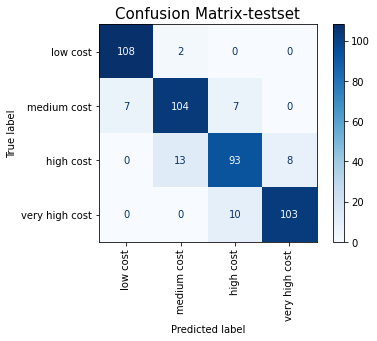

In [70]:
# plotting confusion matrix for test set.
plot_confusion_matrix(rfc,X_test,y_test,cmap= 'Blues',display_labels=Class_cat,xticks_rotation='vertical')
plt.grid(False)
plt.title('Confusion Matrix-testset',fontsize=15)
plt.show()

In [71]:
# printing the classification report for train set.
print('Classification Report:\n\n',classification_report(y_train,y_train_pred))

Classification Report:

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       341
         1.0       1.00      1.00      1.00       333
         2.0       1.00      1.00      1.00       342
         3.0       1.00      1.00      1.00       348

    accuracy                           1.00      1364
   macro avg       1.00      1.00      1.00      1364
weighted avg       1.00      1.00      1.00      1364



In [72]:
# printing the classification report for train set.
print('Classification Report:\n\n',classification_report(y_test,y_pred))

Classification Report:

               precision    recall  f1-score   support

         0.0       0.94      0.98      0.96       110
         1.0       0.87      0.88      0.88       118
         2.0       0.85      0.82      0.83       114
         3.0       0.93      0.91      0.92       113

    accuracy                           0.90       455
   macro avg       0.90      0.90      0.90       455
weighted avg       0.90      0.90      0.90       455



* ***Train accuarcy is 100% and test accuracy is 90%. which is quite good. But model seems to be overfitted and has not generalised the data well. We need to reduce overfitting and improve the model performance.***
* ***we do some hyperparameter tunning to reduce overfitting***

#### 2. Cross- Validation & Hyperparameter Tuning

In [73]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# para_grid values to pass in gridsearchcv.
grid_values={'n_estimators':[300, 400, 500, 700],
          'max_depth':[None, 10, 20, 40],
          'min_samples_split':[2,6,10],
          'max_leaf_nodes':[None],
          'criterion':['entropy','gini'],
          'max_features':['auto','log2','sqrt']
          
             }


# creating the instance
rfc_= RandomForestClassifier(random_state=0)


# Applying GridSearchCV
rfc_tune=GridSearchCV(rfc_,param_grid=grid_values,cv=3,verbose=3,scoring='accuracy')
rfc_tune.fit(X_train,y_train)


Fitting 3 folds for each of 288 candidates, totalling 864 fits
[CV 1/3] END criterion=entropy, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=300;, score=0.888 total time=   0.9s
[CV 2/3] END criterion=entropy, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=300;, score=0.892 total time=   0.9s
[CV 3/3] END criterion=entropy, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=300;, score=0.896 total time=   0.9s
[CV 1/3] END criterion=entropy, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=400;, score=0.884 total time=   1.2s
[CV 2/3] END criterion=entropy, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=400;, score=0.892 total time=   1.1s
[CV 3/3] END criterion=entropy, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=400;, score=0.890 to

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [None, 10, 20, 40],
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'max_leaf_nodes': [None],
                         'min_samples_split': [2, 6, 10],
                         'n_estimators': [300, 400, 500, 700]},
             scoring='accuracy', verbose=3)

In [74]:
#Getting best paramters for the models
rfc_tune.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_samples_split': 2,
 'n_estimators': 300}

In [75]:
# Fit the Algorithm
rfc_optimal=RandomForestClassifier(max_features='auto',criterion='entropy',max_depth=None,max_leaf_nodes=None,min_samples_split=2,n_estimators=300,random_state=0)
rfc_optimal.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=300, random_state=0)

In [76]:
# predicting y values of train and test set.
y_train_pred=rfc_optimal.predict(X_train)
y_pred=rfc_optimal.predict(X_test)

In [77]:
# Accuracy

print('Train set Accuracy: ' )
print(accuracy_score(y_train,y_train_pred))


print('_____________________________________\n')


print('Test set Accuracy:')
print(accuracy_score(y_test,y_pred))

Train set Accuracy: 
1.0
_____________________________________

Test set Accuracy:
0.8967032967032967


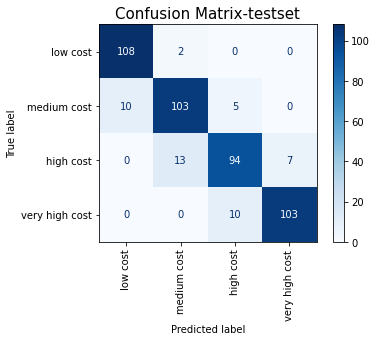

In [78]:
# plotting confusion matrix for test set.
plot_confusion_matrix(rfc_optimal,X_test,y_test,cmap='Blues',display_labels=Class_cat,xticks_rotation='vertical')
plt.grid(False)
plt.title('Confusion Matrix-testset',fontsize=15)
plt.show()

In [79]:
# printing the classification report for train set
print('Classification Report:\n\n',classification_report(y_train,y_train_pred))

Classification Report:

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       341
         1.0       1.00      1.00      1.00       333
         2.0       1.00      1.00      1.00       342
         3.0       1.00      1.00      1.00       348

    accuracy                           1.00      1364
   macro avg       1.00      1.00      1.00      1364
weighted avg       1.00      1.00      1.00      1364



In [80]:
# printing the classification report for train set
print('Classification Report:\n\n',classification_report(y_test,y_pred))

Classification Report:

               precision    recall  f1-score   support

         0.0       0.92      0.98      0.95       110
         1.0       0.87      0.87      0.87       118
         2.0       0.86      0.82      0.84       114
         3.0       0.94      0.91      0.92       113

    accuracy                           0.90       455
   macro avg       0.90      0.90      0.90       455
weighted avg       0.90      0.90      0.90       455



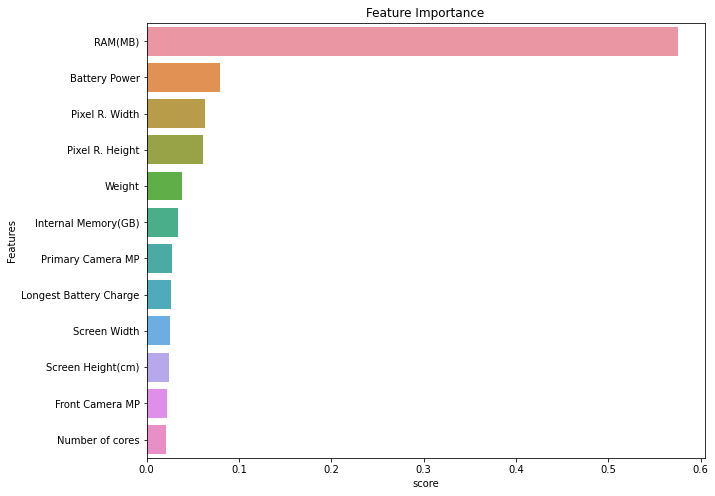

In [81]:
#plotting feature importances
plot_feature_importance(rfc_optimal)

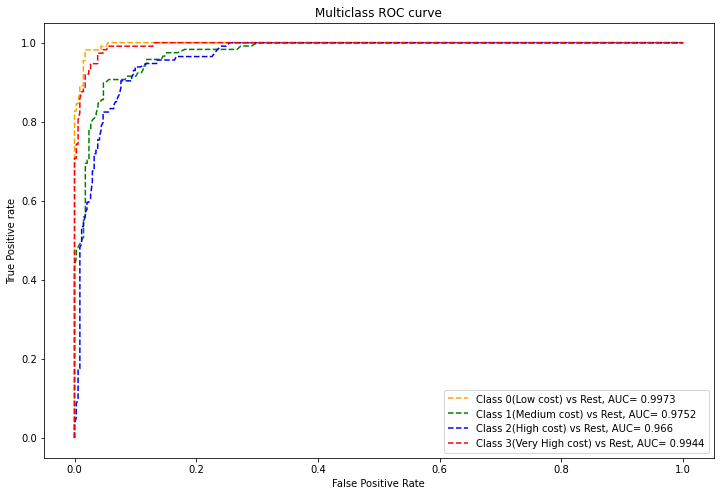

In [82]:
# Plot AUC ROC curve.
pred_prob = rfc_optimal.predict_proba(X_test)
plot_Auc_roc(y_test,pred_prob)

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

***Before Tuning***
* ***training accuarcy = 100%***
* ***test accuarcy = 90%***

***Model is overfitted the data and does not generalised well. So we tuned the hyperparameters.***

***After tuning:***
* ***Training accuarcy= 100%***
* ***Test accuarcy = 90%***



***From roc curve its clear that model has poorly performed to classify class 1 and class 2.***

### ML Model - 3 **Gradient Boosting Classifier**

In [83]:
# ML Model - 3 Implementation
gbc=GradientBoostingClassifier(random_state=0)

# Fit the Algorithm
gbc.fit(X_train,y_train)

# Predict on the model
y_train_pred=gbc.predict(X_train)
y_pred=gbc.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [84]:
# Visualizing evaluation Metric Score chart
# Accuracy

print('Train set Accuracy: ' )
print(accuracy_score(y_train,y_train_pred))


print('_____________________________________\n')


print('Test set Accuracy:')
print(accuracy_score(y_test,y_pred))

Train set Accuracy: 
0.999266862170088
_____________________________________

Test set Accuracy:
0.8835164835164835


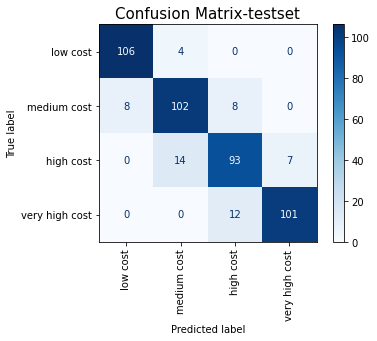

In [85]:
# plotting confusion matrix for test set.
plot_confusion_matrix(gbc,X_test,y_test,cmap='Blues',display_labels=Class_cat,xticks_rotation='vertical')
plt.grid(False)
plt.title('Confusion Matrix-testset',fontsize=15)
plt.show()

In [86]:
# printing the classification report for train set
print('Classificatin Report:\n\n',classification_report(y_train,y_train_pred))

Classificatin Report:

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       341
         1.0       1.00      1.00      1.00       333
         2.0       1.00      1.00      1.00       342
         3.0       1.00      1.00      1.00       348

    accuracy                           1.00      1364
   macro avg       1.00      1.00      1.00      1364
weighted avg       1.00      1.00      1.00      1364



In [87]:
# printing the classification report for train set
print('Classificatin Report:\n\n',classification_report(y_test,y_pred))

Classificatin Report:

               precision    recall  f1-score   support

         0.0       0.93      0.96      0.95       110
         1.0       0.85      0.86      0.86       118
         2.0       0.82      0.82      0.82       114
         3.0       0.94      0.89      0.91       113

    accuracy                           0.88       455
   macro avg       0.88      0.88      0.88       455
weighted avg       0.88      0.88      0.88       455



* ***Train accuracy score= 100%.***
* ***Test accuracy score= 88%***

#### 2. Cross- Validation & Hyperparameter Tuning

In [88]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
gbc=GradientBoostingClassifier(random_state=0)

grid_values={'learning_rate':[0.005,1,2,3],
             'min_samples_split':range(10,26)
          
             }
# Fit the Algorithm
gbc_tune=GridSearchCV(gbc,param_grid=grid_values,cv=3,verbose=1,scoring='accuracy')
gbc_tune.fit(X_train,y_train)


Fitting 3 folds for each of 64 candidates, totalling 192 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'learning_rate': [0.005, 1, 2, 3],
                         'min_samples_split': range(10, 26)},
             scoring='accuracy', verbose=1)

In [89]:
# Getting best parameters
gbc_tune.best_params_

{'learning_rate': 1, 'min_samples_split': 11}

In [90]:
# getting best estimators
gbc_tune.best_estimator_

GradientBoostingClassifier(learning_rate=1, min_samples_split=11,
                           random_state=0)

In [91]:
# aplying best estimarors
gbc_optimal=GradientBoostingClassifier(learning_rate=1,random_state=0,min_samples_split=11)
gbc_optimal.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=1, min_samples_split=11,
                           random_state=0)

In [92]:
# Predict on the model
y_train_pred=gbc_optimal.predict(X_train)  
y_pred=gbc_optimal.predict(X_test)

In [93]:
# Visualizing evaluation Metric Score chart
# Accuracy

print('Train set Accuracy: ' )
print(accuracy_score(y_train,y_train_pred))


print('_____________________________________\n')


print('Test set Accuracy:')
print(accuracy_score(y_test,y_pred))

Train set Accuracy: 
1.0
_____________________________________

Test set Accuracy:
0.8945054945054945


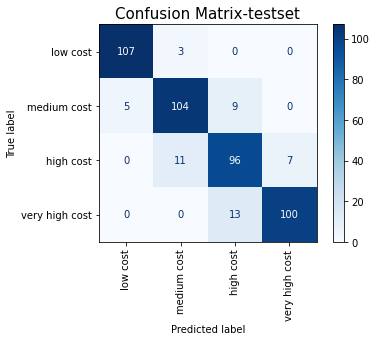

In [94]:
# plotting confusion matrix for test set.
plot_confusion_matrix(gbc_optimal,X_test,y_test,cmap='Blues',display_labels=Class_cat,xticks_rotation='vertical')
plt.grid(False)
plt.title('Confusion Matrix-testset',fontsize=15)
plt.show()

In [95]:
# printing the classification report of train set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       341
         1.0       1.00      1.00      1.00       333
         2.0       1.00      1.00      1.00       342
         3.0       1.00      1.00      1.00       348

    accuracy                           1.00      1364
   macro avg       1.00      1.00      1.00      1364
weighted avg       1.00      1.00      1.00      1364



In [96]:
# printing the classification report of test set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96       110
         1.0       0.88      0.88      0.88       118
         2.0       0.81      0.84      0.83       114
         3.0       0.93      0.88      0.91       113

    accuracy                           0.89       455
   macro avg       0.90      0.90      0.90       455
weighted avg       0.90      0.89      0.89       455



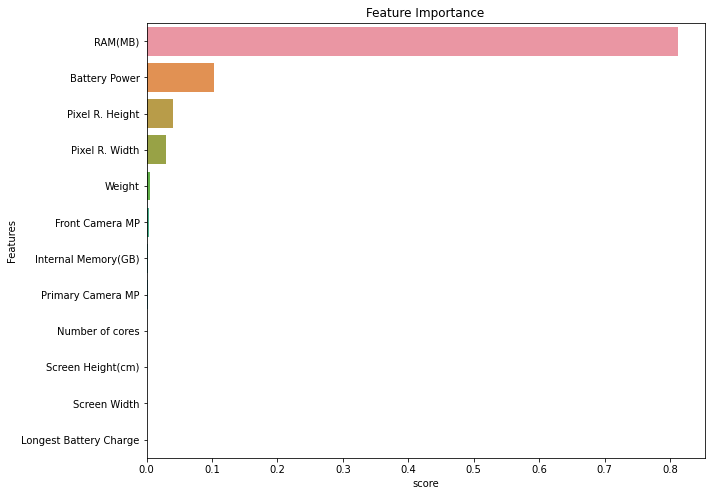

In [97]:
#plotting feature importances
plot_feature_importance(gbc_optimal)

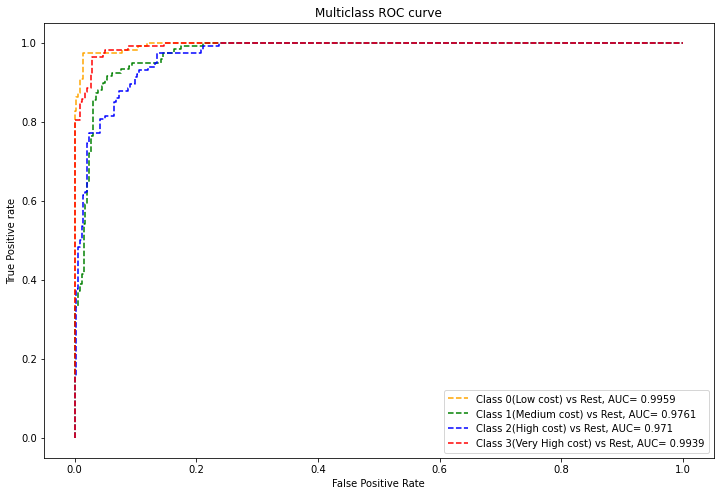

In [98]:
# Plot AUC ROC curve.
pred_prob = gbc_optimal.predict_proba(X_test)
plot_Auc_roc(y_test,pred_prob)

***Before tunning:***
* ***Train accuracy score= 100%.***
* ***Test accuracy score= 88%***

***Model did not generalised well and overfitted the training data.*** ***so we tuned hyperparameters of model.***

***After Hyperparameter Tuning***
* ***Train accuracy score= 100%***
* ***Test accuarcy score=90%***

***Thus we slightly improved the model performance.However the model is not best.***





***From ROC curve it's clear that model was good to classify the class 0 and class 3.***

### ML Model - 4 **K Nearest Neighbours**

In [99]:
# ML Model - 4 Implementation
knn=KNeighborsClassifier() 

# Fit the Algorithm
knn.fit(X_train_scaled,y_train)

# Predict on the model
y_train_pred=knn.predict(X_train_scaled)
y_pred=knn.predict(X_test_scaled)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [100]:
# Accuracy

print('Train set Accuracy: ' )
print(accuracy_score(y_train,y_train_pred))


print('_____________________________________\n')


print('Test set Accuracy:')
print(accuracy_score(y_test,y_pred))

Train set Accuracy: 
0.7543988269794721
_____________________________________

Test set Accuracy:
0.5824175824175825


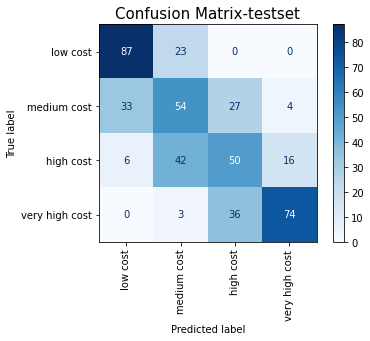

In [101]:
# plotting confusion matrix for test set.
plot_confusion_matrix(knn,X_test_scaled,y_test,cmap='Blues',display_labels=Class_cat,xticks_rotation='vertical')
plt.grid(False)
plt.title('Confusion Matrix-testset',fontsize=15)
plt.show()

In [102]:
# printing the classification report of test set.
print('Classification Report:\n\n',classification_report(y_train,y_train_pred))

Classification Report:

               precision    recall  f1-score   support

         0.0       0.80      0.85      0.82       341
         1.0       0.62      0.67      0.64       333
         2.0       0.70      0.70      0.70       342
         3.0       0.92      0.80      0.86       348

    accuracy                           0.75      1364
   macro avg       0.76      0.75      0.76      1364
weighted avg       0.76      0.75      0.76      1364



In [103]:
# printing the classification report of test set.
print('Classification Report:\n\n',classification_report(y_test,y_pred))

Classification Report:

               precision    recall  f1-score   support

         0.0       0.69      0.79      0.74       110
         1.0       0.44      0.46      0.45       118
         2.0       0.44      0.44      0.44       114
         3.0       0.79      0.65      0.71       113

    accuracy                           0.58       455
   macro avg       0.59      0.59      0.59       455
weighted avg       0.59      0.58      0.58       455



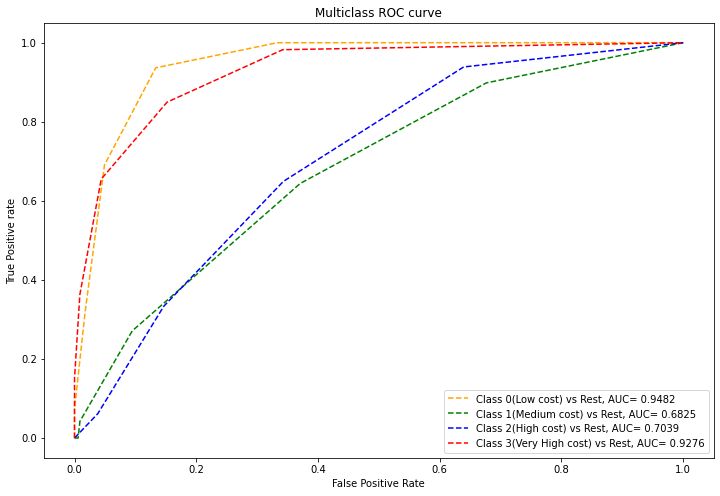

In [104]:
# Plot AUC ROC curve.
pred_prob = knn.predict_proba(X_test_scaled)
plot_Auc_roc(y_test,pred_prob)

#### 2. Cross- Validation & Hyperparameter Tuning

In [105]:
# parameter grid values.
grid_values = {'n_neighbors':list(range(1, 31))}

In [106]:
# applyong GridSearchCv with above grid values and cv=5
knn_tune=GridSearchCV(knn,cv=5,scoring='accuracy',verbose=3,param_grid=grid_values)
knn_tune.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END .....................n_neighbors=1;, score=0.505 total time=   0.0s
[CV 2/5] END .....................n_neighbors=1;, score=0.575 total time=   0.0s
[CV 3/5] END .....................n_neighbors=1;, score=0.564 total time=   0.0s
[CV 4/5] END .....................n_neighbors=1;, score=0.557 total time=   0.0s
[CV 5/5] END .....................n_neighbors=1;, score=0.588 total time=   0.0s
[CV 1/5] END .....................n_neighbors=2;, score=0.498 total time=   0.0s
[CV 2/5] END .....................n_neighbors=2;, score=0.553 total time=   0.0s
[CV 3/5] END .....................n_neighbors=2;, score=0.538 total time=   0.0s
[CV 4/5] END .....................n_neighbors=2;, score=0.524 total time=   0.0s
[CV 5/5] END .....................n_neighbors=2;, score=0.548 total time=   0.0s
[CV 1/5] END .....................n_neighbors=3;, score=0.542 total time=   0.0s
[CV 2/5] END .....................n_neighbors=3

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy', verbose=3)

In [107]:
# getting thge best parameters
knn_tune.best_params_ 

{'n_neighbors': 29}

In [108]:
# fitting the data with best parameters
knn_optimal=KNeighborsClassifier(n_neighbors=29)
knn_optimal.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=29)

In [109]:
# predicting y values of train and test set.
y_train_pred=knn_optimal.predict(X_train_scaled)
y_pred=knn_optimal.predict(X_test_scaled)

In [110]:
# Accuracy

print('Train set Accuracy: ' )
print(accuracy_score(y_train,y_train_pred))


print('_____________________________________\n')


print('Test set Accuracy:')
print(accuracy_score(y_test,y_pred))

Train set Accuracy: 
0.749266862170088
_____________________________________

Test set Accuracy:
0.6747252747252748


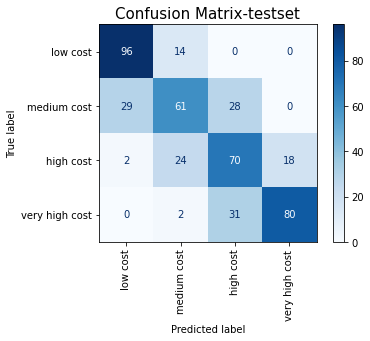

In [111]:
# plotting confusion matrix for test set.
plot_confusion_matrix(knn_optimal,X_test_scaled,y_test,cmap='Blues',display_labels=Class_cat,xticks_rotation='vertical')
plt.grid(False)
plt.title('Confusion Matrix-testset',fontsize=15)
plt.show()

In [112]:
# printig tye classification report of train set.
print('Classification Report:\n\n',classification_report(y_train,y_train_pred))

Classification Report:

               precision    recall  f1-score   support

         0.0       0.84      0.89      0.86       341
         1.0       0.68      0.64      0.66       333
         2.0       0.64      0.67      0.65       342
         3.0       0.83      0.80      0.82       348

    accuracy                           0.75      1364
   macro avg       0.75      0.75      0.75      1364
weighted avg       0.75      0.75      0.75      1364



In [113]:
# printing the classification report of test set.
print('Classification Report:\n\n',classification_report(y_test,y_pred))

Classification Report:

               precision    recall  f1-score   support

         0.0       0.76      0.87      0.81       110
         1.0       0.60      0.52      0.56       118
         2.0       0.54      0.61      0.58       114
         3.0       0.82      0.71      0.76       113

    accuracy                           0.67       455
   macro avg       0.68      0.68      0.68       455
weighted avg       0.68      0.67      0.67       455



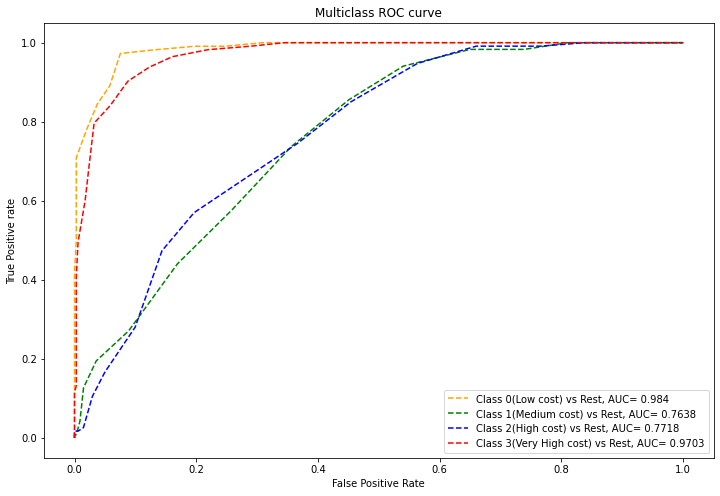

In [114]:
# Plot AUC ROC curve.
pred_prob = knn_optimal.predict_proba(X_test_scaled)
plot_Auc_roc(y_test,pred_prob)

***Before hyperparameters tuning:***

* ***Train Accuracy:75 %***
* ***Test Accuarcy:58 %***

***Clearly Model has performed very worst. We did hyperparameter tuning***

***After Hyperparameter Tuning:***

* ***Train Accuarcy: 75%***
* ***Test Accuarcy: 67%***

***Surely we improved the model perfromance and reduced overfitting but however this is not  good model for us.***

### ML Model - 5 **XGBoost Classifier**

In [115]:
# ML Model - 5 Implementation
xgb=XGBClassifier()

# Fit the Algorithm
xgb.fit(X_train,y_train)

# Predict on the model
y_train_pred=xgb.predict(X_train)
y_pred=xgb.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [116]:
# Accuracy

print('Train set Accuracy: ' )
print(accuracy_score(y_train,y_train_pred))


print('_____________________________________\n')


print('Test set Accuracy:')
print(accuracy_score(y_test,y_pred))

Train set Accuracy: 
0.9897360703812317
_____________________________________

Test set Accuracy:
0.8879120879120879


In [117]:
# confusion matrix
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[108,   2,   0,   0],
       [  7, 104,   7,   0],
       [  0,  15,  92,   7],
       [  0,   0,  13, 100]])

In [118]:
# printing the classification report of train set
print('Classification Report:\n\n',classification_report(y_train,y_train_pred))

Classification Report:

               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       341
         1.0       0.97      0.99      0.98       333
         2.0       1.00      0.98      0.99       342
         3.0       1.00      1.00      1.00       348

    accuracy                           0.99      1364
   macro avg       0.99      0.99      0.99      1364
weighted avg       0.99      0.99      0.99      1364



In [119]:
# printing the classification report of the test set
print('Classification Report:\n\n',classification_report(y_test,y_pred))

Classification Report:

               precision    recall  f1-score   support

         0.0       0.94      0.98      0.96       110
         1.0       0.86      0.88      0.87       118
         2.0       0.82      0.81      0.81       114
         3.0       0.93      0.88      0.91       113

    accuracy                           0.89       455
   macro avg       0.89      0.89      0.89       455
weighted avg       0.89      0.89      0.89       455



#### 2. Cross- Validation & Hyperparameter Tuning

In [120]:
# parameter grid values for GridSearchCv 
grid_values={
          'learning_rate':[0.6,1],
          'n_estimators':[500,1000],
          'gamma':[0.2],
          'subsample':[0.5,0.6]
          }

In [121]:
# creating an object of the classifier
xgb = XGBClassifier()

# applying girdsearchcv 
xgb_tune = GridSearchCV(xgb, grid_values, cv=3,verbose=4)
xgb_tune.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV 1/3] END gamma=0.2, learning_rate=0.6, n_estimators=500, subsample=0.5;, score=0.901 total time=   0.9s
[CV 2/3] END gamma=0.2, learning_rate=0.6, n_estimators=500, subsample=0.5;, score=0.912 total time=   0.9s
[CV 3/3] END gamma=0.2, learning_rate=0.6, n_estimators=500, subsample=0.5;, score=0.905 total time=   0.9s
[CV 1/3] END gamma=0.2, learning_rate=0.6, n_estimators=500, subsample=0.6;, score=0.890 total time=   0.9s
[CV 2/3] END gamma=0.2, learning_rate=0.6, n_estimators=500, subsample=0.6;, score=0.932 total time=   0.9s
[CV 3/3] END gamma=0.2, learning_rate=0.6, n_estimators=500, subsample=0.6;, score=0.914 total time=   0.9s
[CV 1/3] END gamma=0.2, learning_rate=0.6, n_estimators=1000, subsample=0.5;, score=0.892 total time=   1.7s
[CV 2/3] END gamma=0.2, learning_rate=0.6, n_estimators=1000, subsample=0.5;, score=0.914 total time=   1.7s
[CV 3/3] END gamma=0.2, learning_rate=0.6, n_estimators=1000, subsample=0.

GridSearchCV(cv=3, estimator=XGBClassifier(),
             param_grid={'gamma': [0.2], 'learning_rate': [0.6, 1],
                         'n_estimators': [500, 1000], 'subsample': [0.5, 0.6]},
             verbose=4)

In [122]:
xgb_tune.best_params_

{'gamma': 0.2, 'learning_rate': 0.6, 'n_estimators': 500, 'subsample': 0.6}

In [123]:
xgb_opti=XGBClassifier(learning_rate=0.6,gamma=0.2,n_estimators=500,subsample=0.6)
xgb_opti.fit(X_train,y_train)

XGBClassifier(gamma=0.2, learning_rate=0.6, n_estimators=500,
              objective='multi:softprob', subsample=0.6)

In [124]:
y_train_pred=xgb_opti.predict(X_train)
y_pred=xgb_opti.predict(X_test)

In [125]:
# Accuracy

print('Train set Accuracy: ' )
print(accuracy_score(y_train,y_train_pred))


print('_____________________________________\n')


print('Test set Accuracy:')
print(accuracy_score(y_test,y_pred))

Train set Accuracy: 
1.0
_____________________________________

Test set Accuracy:
0.9252747252747253


In [126]:
# confusion matrix
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[109,   1,   0,   0],
       [  4, 106,   8,   0],
       [  0,   8, 100,   6],
       [  0,   0,   7, 106]])

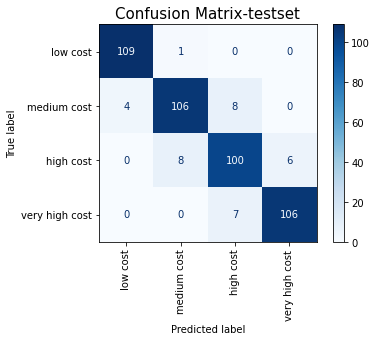

In [127]:
# plotting confusion matrix for test set.
plot_confusion_matrix(xgb_opti,X_test,y_test,cmap='Blues',display_labels=Class_cat,xticks_rotation='vertical')
plt.grid(False)
plt.title('Confusion Matrix-testset',fontsize=15)
plt.show()

In [128]:
# printing the classification report of train set
print('Classification Report:\n\n',classification_report(y_train,y_train_pred))

Classification Report:

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       341
         1.0       1.00      1.00      1.00       333
         2.0       1.00      1.00      1.00       342
         3.0       1.00      1.00      1.00       348

    accuracy                           1.00      1364
   macro avg       1.00      1.00      1.00      1364
weighted avg       1.00      1.00      1.00      1364



In [129]:
# printing the classification report of the test set
print('Classification Report:\n\n',classification_report(y_test,y_pred))

Classification Report:

               precision    recall  f1-score   support

         0.0       0.96      0.99      0.98       110
         1.0       0.92      0.90      0.91       118
         2.0       0.87      0.88      0.87       114
         3.0       0.95      0.94      0.94       113

    accuracy                           0.93       455
   macro avg       0.93      0.93      0.93       455
weighted avg       0.93      0.93      0.93       455



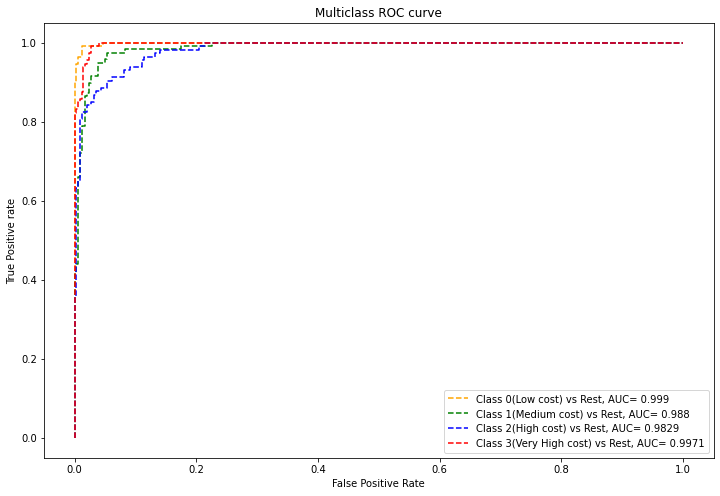

In [130]:
# Plot AUC ROC curve.
pred_prob = xgb_opti.predict_proba(X_test)
plot_Auc_roc(y_test,pred_prob)

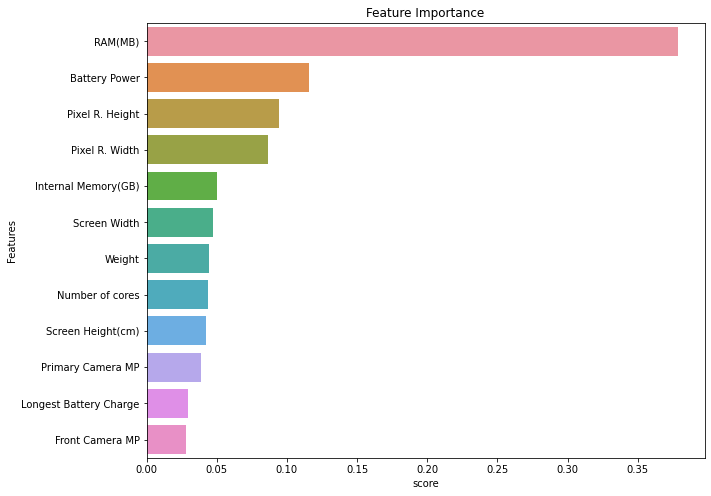

In [131]:
#plotting feature importances
plot_feature_importance(xgb_opti)

***Before hyperparameter Tuning***
* ***Train Accuarcy = 98%***
* ***Test Accuarcy = 90%***

***After hyperparameter Tuning***
* ***Train Accuarcy = 100%***
* ***Test Accuarcy = 92%***

***we have improved the model performance by Hyperparamter tuning. Test accuracy is increased to 92%.But still the difference of accuracy score between train and test is  more than 5%.We can say model is very slightly overfitted***

***From AUC-ROC curve its clear that model has almost correctly predicted the class 0 and class 3.***

### ML Model - 6 **Support Vector Machine**

In [132]:

# ML Model -  Implementation
svc = SVC(random_state=101)

# Fit the Algorithm
svc.fit(X_train_scaled,y_train)

# Predict on the model
y_train_pred=svc.predict(X_train_scaled)
y_pred=svc.predict(X_test_scaled)



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [133]:
# Accuracy

print('Train set Accuracy: ' )
print(accuracy_score(y_train,y_train_pred))


print('_____________________________________\n')


print('Test set Accuracy:')
print(accuracy_score(y_test,y_pred))

Train set Accuracy: 
0.9831378299120235
_____________________________________

Test set Accuracy:
0.9318681318681319


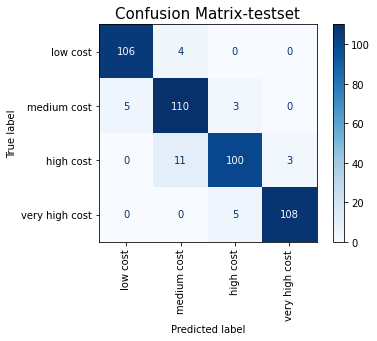

In [134]:
# plotting confusion matrix for test set.
plot_confusion_matrix(svc,X_test_scaled,y_test,cmap='Blues',display_labels=Class_cat,xticks_rotation='vertical')
plt.grid(False)
plt.title('Confusion Matrix-testset',fontsize=15)
plt.show()

In [135]:
#printing the classifiaction report of train set.
print('Classfication Report:\n\n:',classification_report(y_train,y_train_pred))

Classfication Report:

:               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       341
         1.0       0.98      0.97      0.97       333
         2.0       0.97      0.98      0.98       342
         3.0       0.99      0.99      0.99       348

    accuracy                           0.98      1364
   macro avg       0.98      0.98      0.98      1364
weighted avg       0.98      0.98      0.98      1364



In [136]:
#printing the classifiaction report of train set.
print('Classfication Report:\n\n:',classification_report(y_test,y_pred))

Classfication Report:

:               precision    recall  f1-score   support

         0.0       0.95      0.96      0.96       110
         1.0       0.88      0.93      0.91       118
         2.0       0.93      0.88      0.90       114
         3.0       0.97      0.96      0.96       113

    accuracy                           0.93       455
   macro avg       0.93      0.93      0.93       455
weighted avg       0.93      0.93      0.93       455



* ***Accuracy score on train set is 98% and Test score is 93%.***

#### 2. Cross- Validation & Hyperparameter Tuning

In [137]:
# parameter grid for GridSearchCv
grid_values = {
    'C':[0.01,0.1,1,10],
    'kernel' : ["linear","poly","rbf","sigmoid"],
    'degree' : [1,3,5,7],
    'gamma' : [0.01,1]
}

In [138]:
svm  = SVC ()

In [139]:
# Hyperparameter tuning with the GrdiSearhCV with cv=5
svm_cv = GridSearchCV(svm, grid_values, cv = 5,verbose=2)

# fitting the data into the model
svm_cv.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
[CV] END ........C=0.01, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ........C=0.01, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ........C=0.01, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ........C=0.01, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ........C=0.01, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ..........C=0.01, degree=1, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ..........C=0.01, degree=1, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ..........C=0.01, degree=1, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ..........C=0.01, degree=1, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ..........C=0.01, degree=1, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ...........C=0.01, degree=1, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END ...........C=0.01, degree=1, gamma=0.

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10], 'degree': [1, 3, 5, 7],
                         'gamma': [0.01, 1],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=2)

In [140]:
# getting the best parameters
svm_cv.best_params_

{'C': 10, 'degree': 1, 'gamma': 0.01, 'kernel': 'linear'}

In [141]:
# getting the best estimators
svm_cv.best_estimator_

SVC(C=10, degree=1, gamma=0.01, kernel='linear')

In [142]:
# applying best parameters to the SVm model.
svm_optimal=SVC(C=10, degree=1, gamma=0.01, kernel='linear',probability=True)

# fitting the data
svm_optimal.fit(X_train_scaled,y_train)   

# predicting the y values of train and test set.
y_train_pred=svm_optimal.predict(X_train_scaled)    
y_pred=svm_optimal.predict(X_test_scaled)

In [143]:
# Accuracy

print('Train set Accuracy: ' )
print(accuracy_score(y_train,y_train_pred))


print('_____________________________________\n')


print('Test set Accuracy:')
print(accuracy_score(y_test,y_pred))

Train set Accuracy: 
0.9824046920821115
_____________________________________

Test set Accuracy:
0.9648351648351648


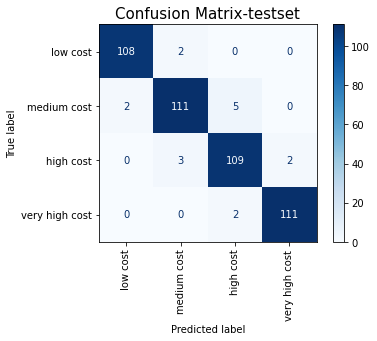

In [144]:
# plotting confusion matrix for test set.
plot_confusion_matrix(svm_optimal,X_test_scaled,y_test,cmap='Blues',display_labels=Class_cat,xticks_rotation='vertical')
plt.grid(False)
plt.title('Confusion Matrix-testset',fontsize=15)
plt.show()

In [145]:
#printing the classifiaction report of train set.
print('Classification Report:\n\n',classification_report(y_train,y_train_pred))

Classification Report:

               precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       341
         1.0       0.98      0.97      0.98       333
         2.0       0.97      0.98      0.97       342
         3.0       0.99      0.99      0.99       348

    accuracy                           0.98      1364
   macro avg       0.98      0.98      0.98      1364
weighted avg       0.98      0.98      0.98      1364



In [146]:
#printing the classifiaction report of train set.
print('Classification Report:\n\n',classification_report(y_test,y_pred))

Classification Report:

               precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       110
         1.0       0.96      0.94      0.95       118
         2.0       0.94      0.96      0.95       114
         3.0       0.98      0.98      0.98       113

    accuracy                           0.96       455
   macro avg       0.97      0.97      0.97       455
weighted avg       0.96      0.96      0.96       455



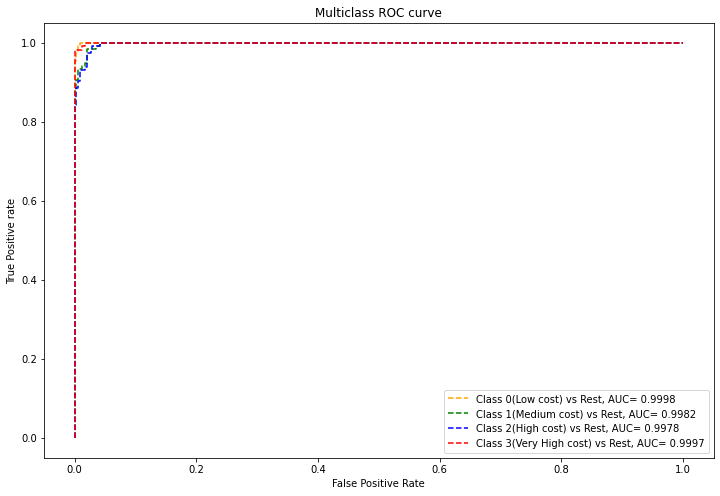

In [147]:
# Plot AUC ROC curve.
pred_prob = svm_optimal.predict_proba(X_test_scaled)
plot_Auc_roc(y_test,pred_prob)

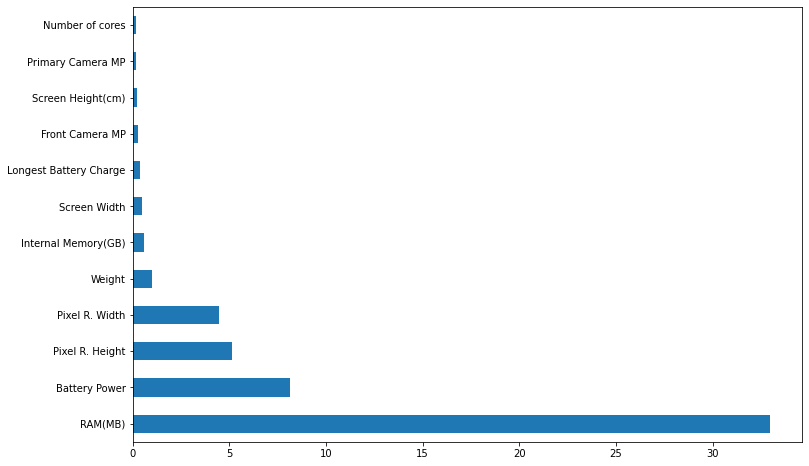

In [148]:
plt.figure(figsize=(12,8))
pd.Series(abs(svm_optimal.coef_[0])+abs(svm_optimal.coef_[1])+abs(svm_optimal.coef_[2])+abs(svm_optimal.coef_[3]), index=X_train.columns).nlargest(12).plot(kind='barh')

* ***Accuracy score on train set is 98% and Test score is 93%.***

* ***After Hyperparameter tuning train accuracy remained almost same  98% and test accuracy score increased to 96%.*** 
*  ***SVM performed very well as compared to other alogorithms.***
* ***In terms of feature importance 'RAM(MB)', 'Battery Power', 'Pixel R. Height' and 'Pixel R. Width' are the imporatant features.***
* ***f1 score for individual classes is also very good. Area under curve for each class prediction is also almost 1.***


### 2. Which ML model did you choose from the above created models as your final prediction model and why?

* **For our dataset Support Vector Machine has proven to be the best it mainly gives Good accuracy for many simple data sets and it performs well when the dataset is linearly separable(as in our case).**

# **Conclusion**

**EDA**
*   Data Wrangling and Data Visualization has provided the best idea about the features involved in the datset.

*   We are fortunate that the dataset was almost a cleaned one with no null values present or duplicate records found, it helped in maintaining the correct pace.

*   Most of the categorical features had a similar distribution or count except the feature '3G'. There were very few records for mobile phones which doesn't support 3G. 

*   While determining the distribution of Categorical features with respect to the taget variable finding states that all the categorical variables namely 'dual_sim', 'wifi', 'blue', 'touch_screen', 'three_g', 'four_g' have a similar count of data for each classes which ranges mostly in between 230 -260(almost)except the variable 'three_g'.In 'three_g' there are very few number of mobiles which doesn't support 3G across all the price ranges.And the number of mobile phones that supports 3G(comparing to mobiles not having 3G) ranges more than 350.
* *By increasing the size of ram , price increase alot.*
* *Most number of low cost mobiles, has battery power 750(mAh). Most expensive mobiles have better batteries i.e. 1500-2000(mah)*
* *Heviest mobiles have low cost**
* *Most of mobiles in all price range, has 0.5 clock speed.*
* *Very high cost mobiles have bigger height and width in cm*
* *mobiles that don't have front camera have medium price*
* *Most of mobiles in all price range, has front camera with 2 mega pixel.*
* *Most of mobiles in all price range, has 4 cm width.*



 **ML Classification**

*   Based on to our main objective to predict the Mobile Price Range. **Support Vector Machine** is the best performing model, out off all the other models used  namely Decision tree, Gradient Boosting, Knn, Random Forest, XGBoost.

*   Knn model is the worst performing models for our dataset


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***